# Title : Credit Card Fraud Detection

## Background

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase

## Project Plan

1. The dataset was obtained from Kaggle (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/download?datasetVersionNumber=3).

2. The explored and engineered data was preprocessed. 
    - The data was split into training and testing sets. 
    - Both training and testing sets were checked for duplication and missing values were checked. 
        - Missing numerical data was imputed using median. 
    - Outliers were identified and cleaned. 
    - Features were then scaled to map the variables onto the same scale. 

3. 12 baseline models were trained, including Logistic Regression, Decision Tree Classifier, K-Neighbors Classifier, MLP Classifier, Gaussian-Naive Bayes, Bernoulli-Naive Bayes, Multinomial Naive Bayes, Support Vector Classifier, SGD Classifier, Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 
    - Nested cross validation was used to perform feature selection and hyperparameter tuning simulteneously, and then train the models, in order to mitigate overfitting. 
    - SelectKBest was used for feature selection.
    - RandomizedSearchCV was used for hyperparameter tuning.
    - StratifiedKFold was used for cross validation as the dataset is highly imbalanced.
    - The models were evaluated based on Accuracy, Balanced Accuracy, Precision, Recall, F1 Score, ROC-AUC, PR-AUC, Cohen Kappa Score, Fit Time and Score Time. 

4. The best performing models were shortlisted by focusing on the ‘Balanced Accuracy’, ‘F1’, ‘PR-AUC’, ‘ROC-AUC’, ‘Cohen's Kappa Score’ and ‘Time Taken For Training’ of the various models. These metrics were chosen as they are most suited for a highly imbalanced dataset. 
    - Learning curves were also used to assess which models had overfitting.

5. The 3 best performing models, were chosen for model stacking. 3 Ensemble Models were created using the combinations of these three classifiers. 

6. Lastly the 3 best performing models and the 3 Ensemble Models were evaluated using the same metrics as above and learning curves and the results were compare to determine the best model.


## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

file = 'creditcard.csv'
data = pd.read_csv(file)
#data = df.sample(n=50000, random_state=1)
target = 'Class'

## Data Understanding

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

## Exploratory Data Analysis

In [2]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Exploring Categorical Variables

In [8]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


### Exploring Numerical Variables

In [9]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 31 numerical variables

The numerical variables are : ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [10]:
data[numerical].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Summary of numerical variables**
- All of the numerical variables are of continuous type.

In [11]:
# view summary statistics in numerical variables

print(round(data[numerical].describe()),2)

           Time        V1        V2        V3        V4        V5        V6  \
count  284807.0  284807.0  284807.0  284807.0  284807.0  284807.0  284807.0   
mean    94814.0       0.0       0.0      -0.0       0.0       0.0       0.0   
std     47488.0       2.0       2.0       2.0       1.0       1.0       1.0   
min         0.0     -56.0     -73.0     -48.0      -6.0    -114.0     -26.0   
25%     54202.0      -1.0      -1.0      -1.0      -1.0      -1.0      -1.0   
50%     84692.0       0.0       0.0       0.0      -0.0      -0.0      -0.0   
75%    139320.0       1.0       1.0       1.0       1.0       1.0       0.0   
max    172792.0       2.0      22.0       9.0      17.0      35.0      73.0   

             V7        V8        V9  ...       V21       V22       V23  \
count  284807.0  284807.0  284807.0  ...  284807.0  284807.0  284807.0   
mean       -0.0       0.0      -0.0  ...       0.0      -0.0       0.0   
std         1.0       1.0       1.0  ...       1.0       1.0      

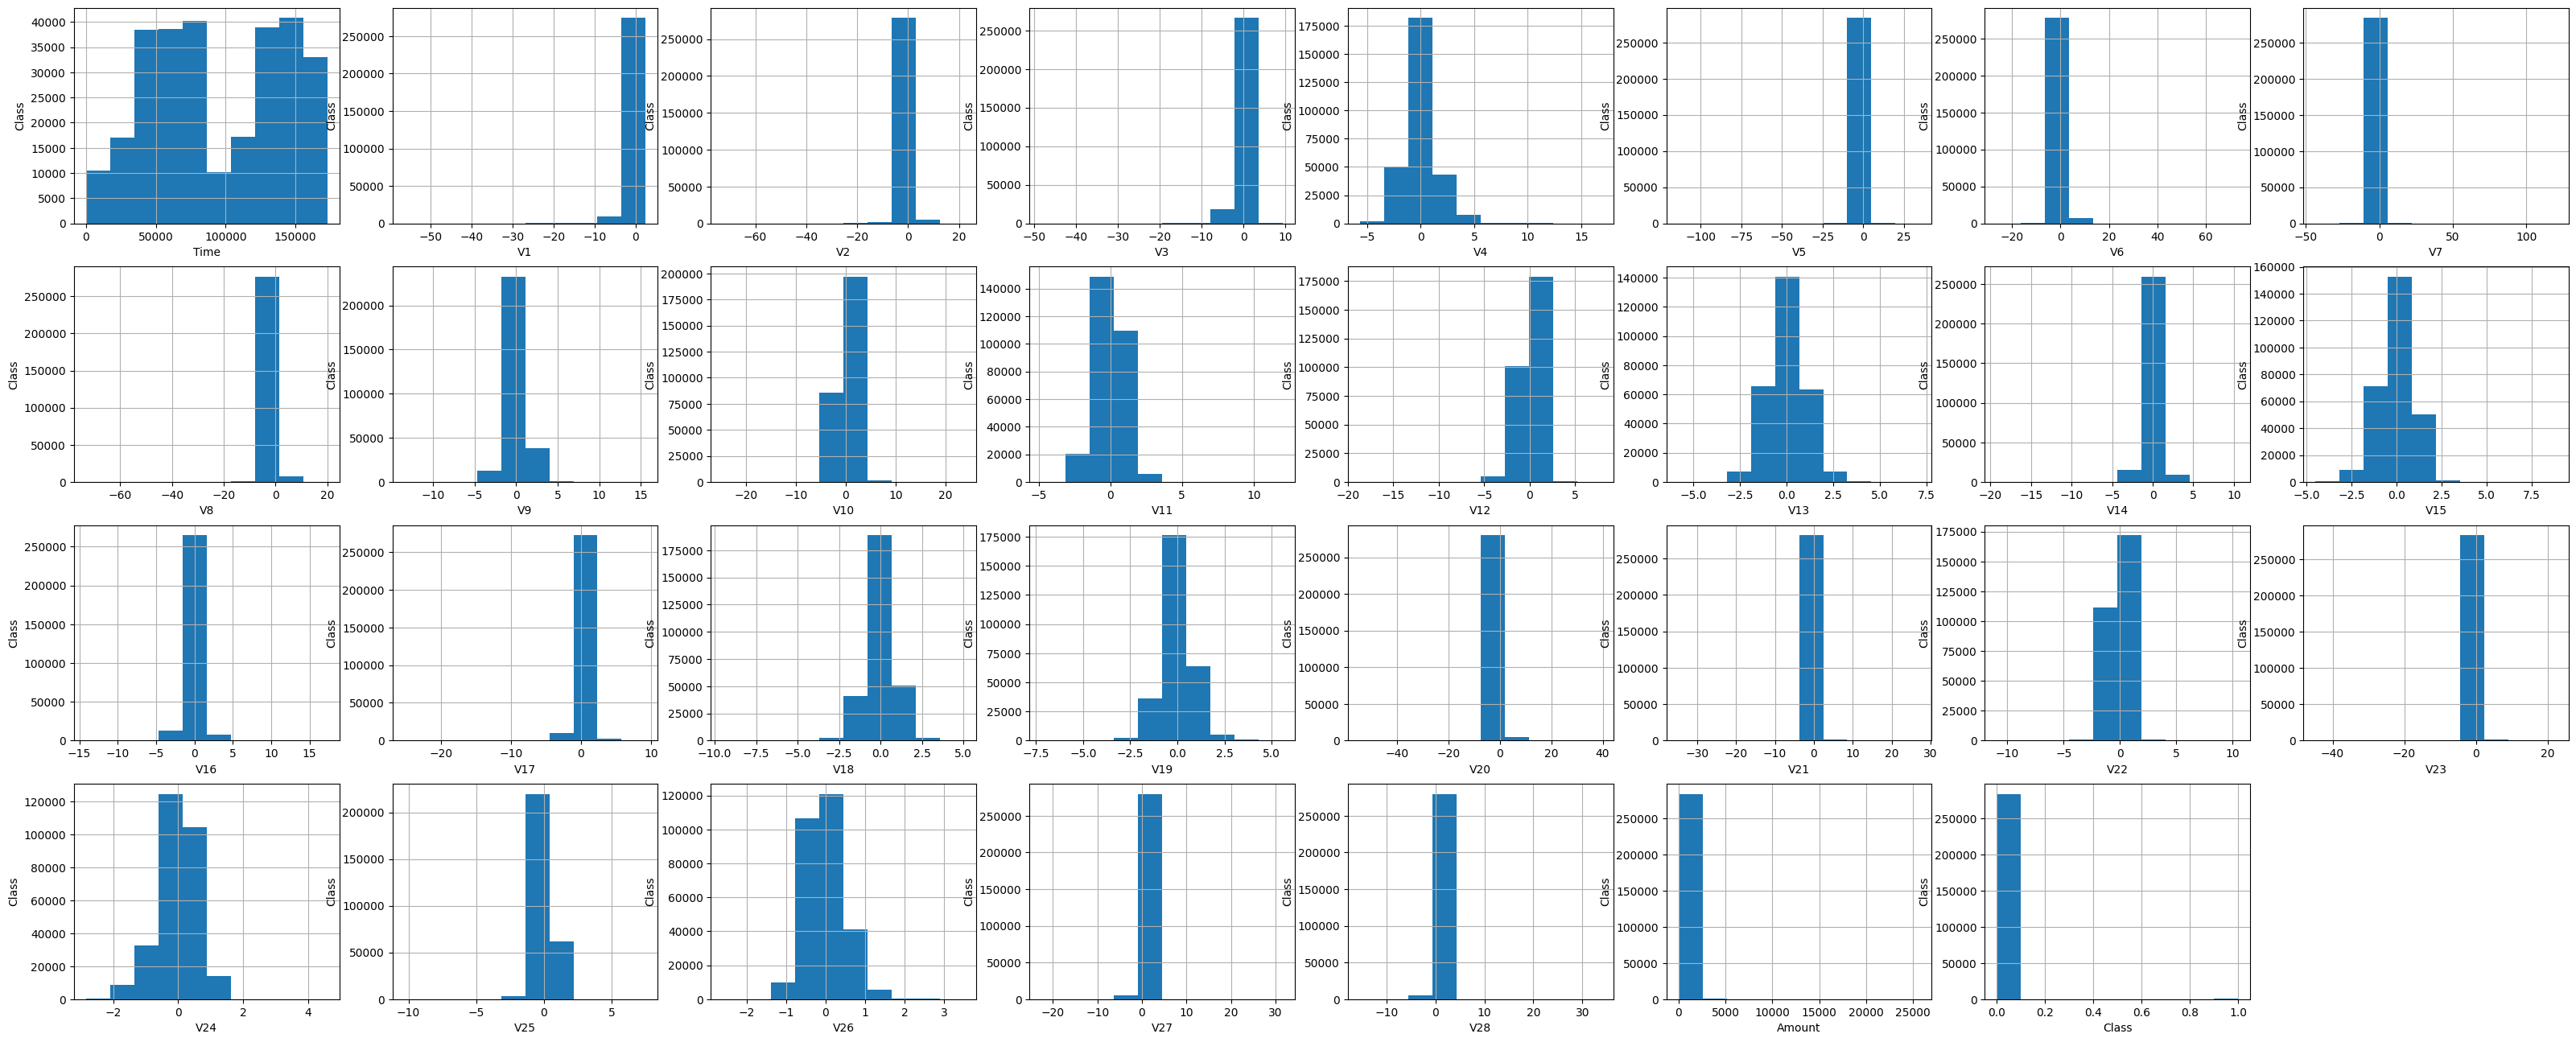

In [12]:
# plot histogram to check distribution

n_rows = 4
n_columns = (len(numerical) // 4) + (len(numerical) % 4 > 0)

plt.figure(figsize=(5*n_columns,4*n_rows))

index = 1

for feature in numerical:
    plt.subplot(n_rows, n_columns, index)
    fig = data[feature].hist(bins=10)
    fig.set_xlabel(feature)
    fig.set_ylabel(target)
    index = index + 1


### Exploring Class Distribution

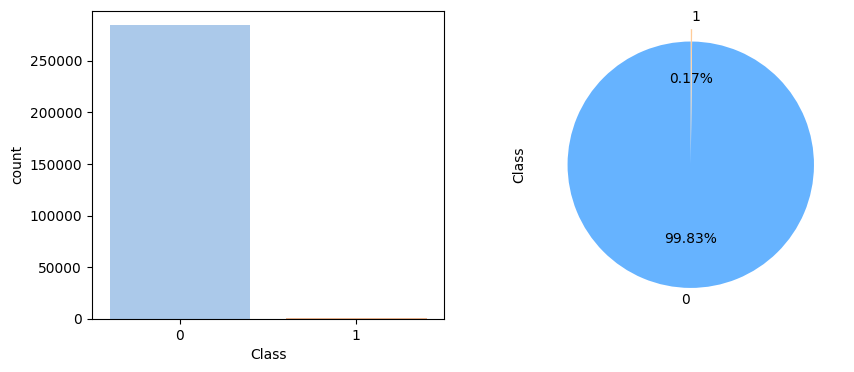

In [13]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(10,4))
labels = data[target].value_counts().index
sns.countplot(x=data[target], data=data, palette="pastel",ax=ax[0])
data[target].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66b3ff','#ffcc99'], 
                                             labels=labels, explode = (0, 0.1), startangle=90)
plt.show()

Most of the classes of 'Class' is 0. Therefore, this dataset is imbalanced. To address this StratifiedKFold cross validation will be used to evaluate the models.

### Multivariate Analysis

Multivariate means involving multiple dependent variables resulting in one outcome. For example, we cannot predict whether it will rain based on the temperature alone. There are multiple factors like wind direction,wind speed, humidity etc. 

**Heatmap**

A heatmap is a graphical representation of data where values are depicted by color. Heat maps make it easy to visualize complex data and understand it at a glance. In this case, the heat map is used to visualize the correlation between any two variables. 

<AxesSubplot: >

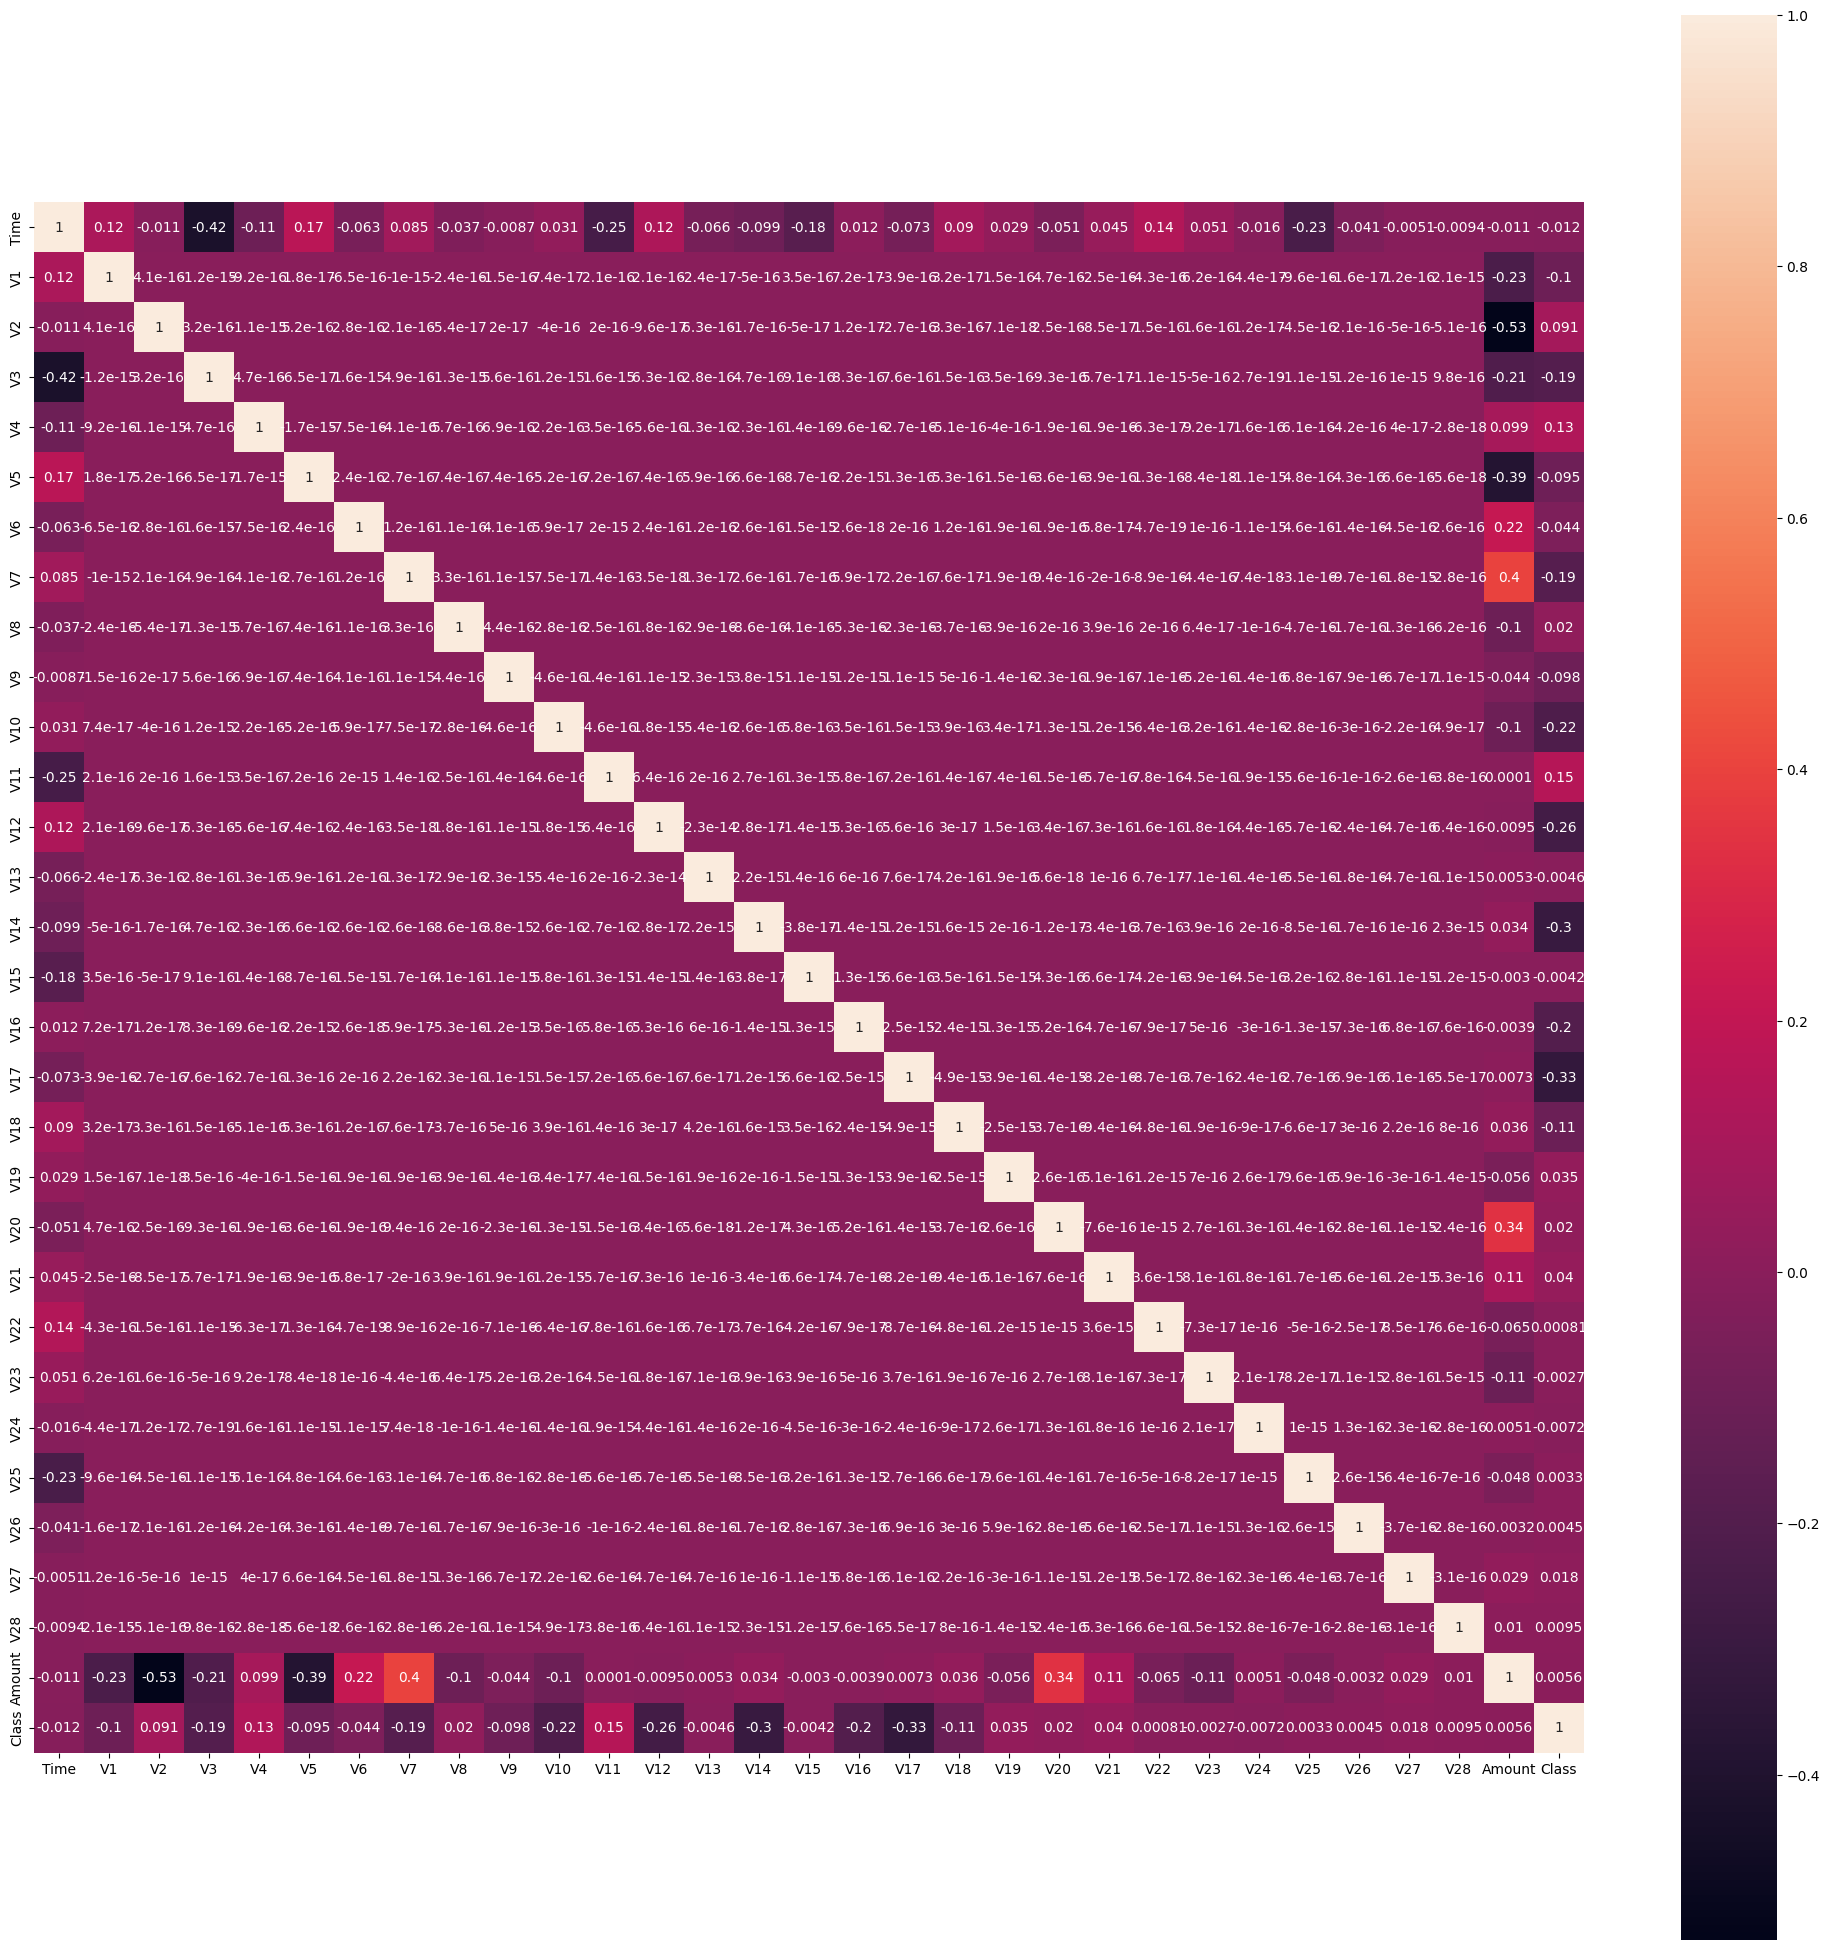

In [14]:
corrmat = data.corr()
plt.subplots(figsize=(25,25))
sns.heatmap(corrmat,annot=True, square=True)

None of the feature are highly correlated

### Checking for Duplicates

In [15]:
data.duplicated().sum()

1081

In [16]:
data.drop_duplicates(inplace=True, ignore_index=True)

## Preparing features and target

In [17]:
X = data.drop(['Time', target], axis=1)

y = data[target]

## Splitting data into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
X_train.shape, X_test.shape

((226980, 29), (56746, 29))

## Handling Missing Values

### Impute Missing Values in Numerical Variables

In [20]:
numerical = [var for var in X_train.columns if X_train[var].dtype!='O']

X_train[numerical].isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [21]:
X_test[numerical].isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [22]:
num_missing = data[numerical].columns[data[numerical].isnull().any()].tolist()
num_missing

[]

There are no missing values

## Engineering Outliers

**Outlier cleaning for training data**

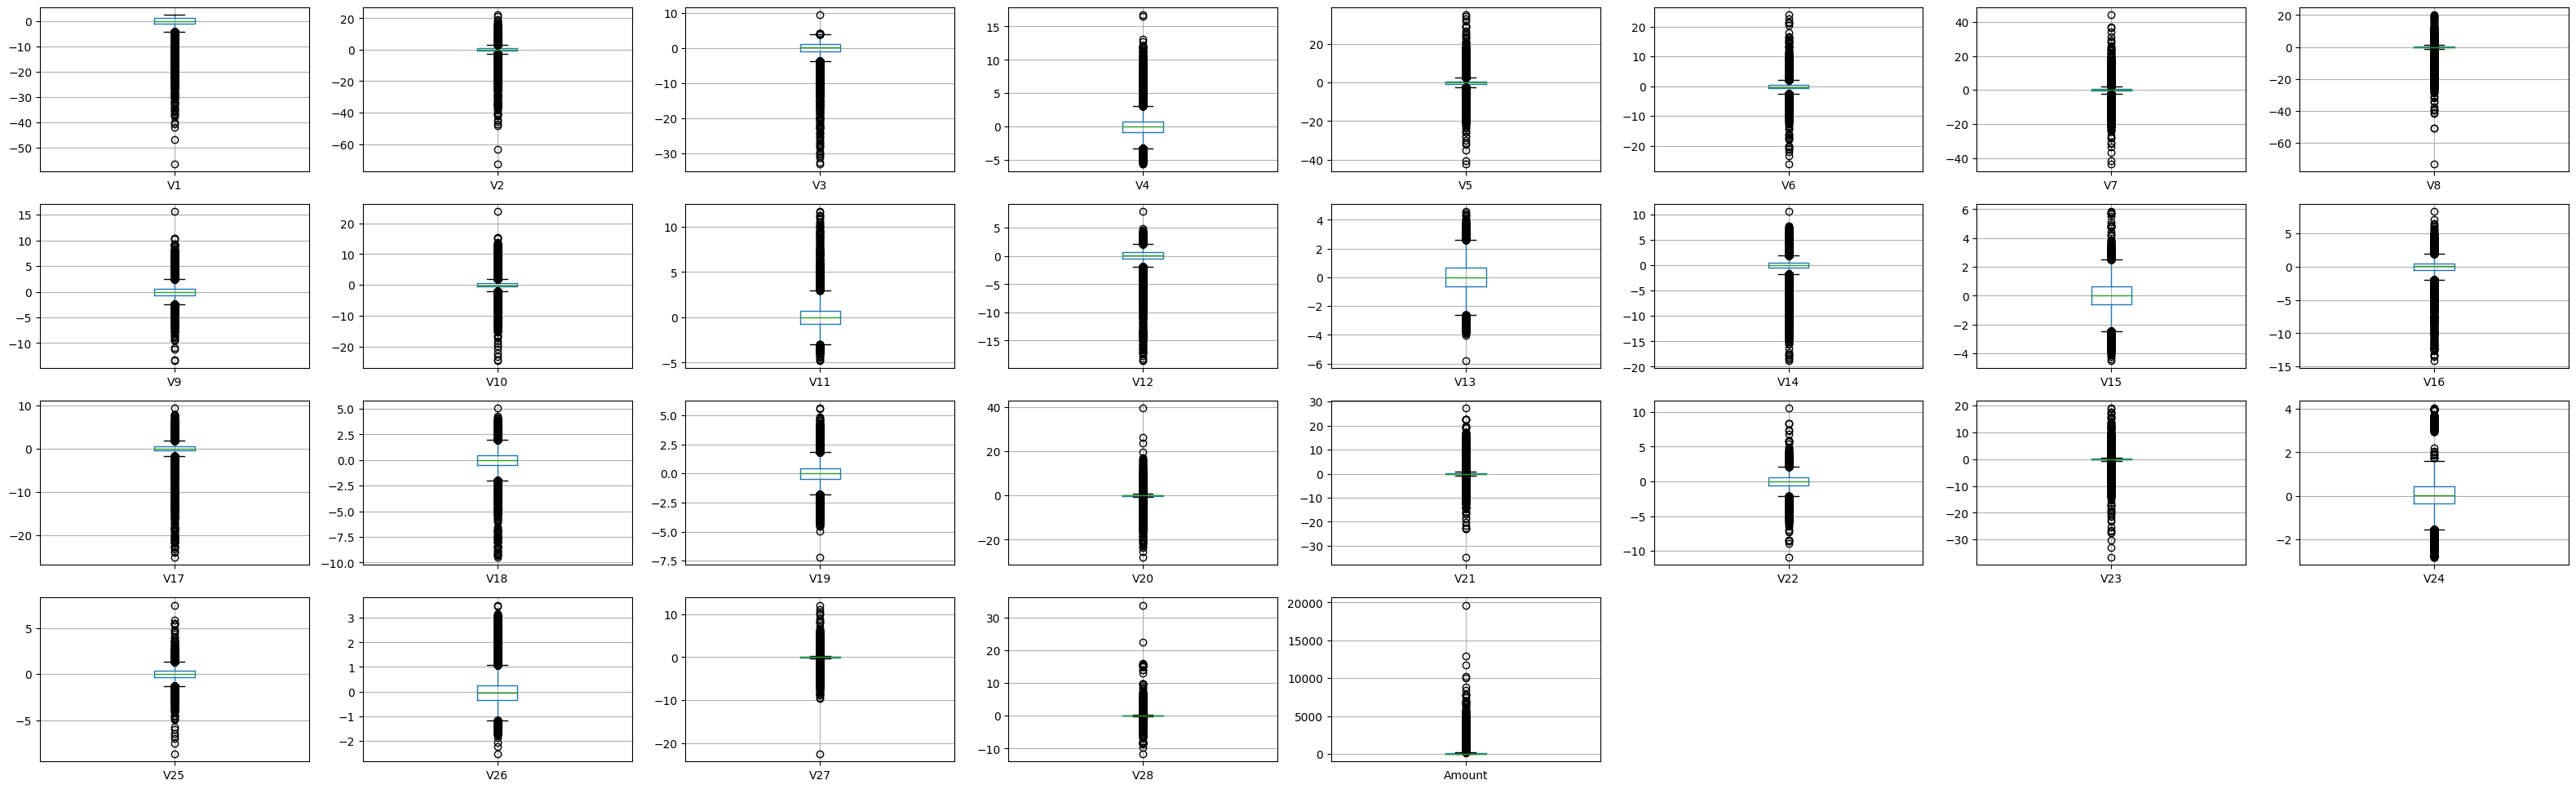

In [23]:
# draw boxplots to visualize outliers

def boxplot_for_outlier(df,columns):
    n_rows = 4
    n_columns = (len(columns) // 4) + (len(columns) % 4 > 0)
    plt.figure(figsize=(5*n_columns,3*n_rows))
    index = 1
    for feature in columns:
        plt.subplot(n_rows, n_columns, index)
        fig = df.boxplot(column=feature)
        index = index + 1

boxplot_for_outlier(X_train, numerical)

In [24]:
outlier_percentage_cutoff = 0.1

lower_and_upper={}
X_train_outlier = X_train.copy()

for feature in numerical:
    q1=X_train_outlier[feature].describe()[4]
    q3=X_train_outlier[feature].describe()[6]
    iqr=q3-q1
    lowerbound = q1 - (1.5 * iqr)
    upperbound = q3 + (1.5 * iqr)
    lower_and_upper[feature]=(lowerbound,upperbound)
    number_of_outlier = X_train_outlier.loc[(X_train_outlier.loc[:,feature]<lowerbound)\
                                                        | (X_train_outlier.loc[:,feature]>upperbound)].shape[0]
    if(number_of_outlier > outlier_percentage_cutoff * X_train_outlier.shape[0]):
        sparse_value = X_train_outlier[feature].mode()[0]
        nonsparse_data = pd.DataFrame(X_train_outlier[X_train_outlier[feature] != sparse_value][feature])
        q1=nonsparse_data[feature].describe()[4]
        q3=nonsparse_data[feature].describe()[6]
        iqr=q3-q1
        lowerbound = q1 - (1.5*iqr)
        upperbound = q3 + (1.5*iqr)
        lower_and_upper[feature]=(lowerbound,upperbound)
        nonsparse_data.loc[(nonsparse_data.loc[:,feature]<lowerbound),feature] =  lowerbound*0.75
        nonsparse_data.loc[(nonsparse_data.loc[:,feature]>upperbound),feature] =  upperbound*1.25
        number_of_outlier = nonsparse_data.loc[(nonsparse_data.loc[:,feature]<lowerbound)\
                                                        | (nonsparse_data.loc[:,feature]>upperbound)].shape[0]
        X_train_outlier[feature][nonsparse_data.index]=nonsparse_data[feature]
        print(number_of_outlier," outlier values cleared in" ,feature)
    else:
        print(number_of_outlier," outlier values cleared in" ,feature)
        X_train_outlier.loc[(X_train_outlier.loc[:,feature]<lowerbound),feature] =  lowerbound*0.75
        X_train_outlier.loc[(X_train_outlier.loc[:,feature]>upperbound),feature] =  upperbound*1.25

5544  outlier values cleared in V1
10756  outlier values cleared in V2
2663  outlier values cleared in V3
8841  outlier values cleared in V4
9685  outlier values cleared in V5
18214  outlier values cleared in V6
7058  outlier values cleared in V7
19057  outlier values cleared in V8
6562  outlier values cleared in V9
7526  outlier values cleared in V10
613  outlier values cleared in V11
12306  outlier values cleared in V12
2693  outlier values cleared in V13
11257  outlier values cleared in V14
2276  outlier values cleared in V15
6534  outlier values cleared in V16
5883  outlier values cleared in V17
5980  outlier values cleared in V18
8115  outlier values cleared in V19
22104  outlier values cleared in V20
11540  outlier values cleared in V21
1027  outlier values cleared in V22
14777  outlier values cleared in V23
3778  outlier values cleared in V24
4220  outlier values cleared in V25
4507  outlier values cleared in V26
15668  outlier values cleared in V27
9386  outlier values cleared 

**Outlier cleaning for testing data**




In [25]:
X_test_outlier = X_test.copy()

for feature in numerical:
    number_of_outlier_test = X_test_outlier.loc[(X_test_outlier.loc[:,feature]<lower_and_upper[feature][0])\
                                                | (X_test_outlier.loc[:,feature]>lower_and_upper[feature][1])].shape[0]
    if(number_of_outlier > outlier_percentage_cutoff * X_test_outlier.shape[0]):
        sparse_value = X_test_outlier[feature].mode()[0]
        nonsparse_data = pd.DataFrame(X_test_outlier[X_test_outlier[feature] != sparse_value][feature])
        nonsparse_data.loc[(nonsparse_data.loc[:,feature]<lower_and_upper[feature][0]),feature] =  lower_and_upper[feature][0]*0.75
        nonsparse_data.loc[(nonsparse_data.loc[:,feature]>lower_and_upper[feature][1]),feature] =  lower_and_upper[feature][1]*1.25
        X_test_outlier[feature][nonsparse_data.index]=nonsparse_data[feature]
        number_of_outlier_test = nonsparse_data.loc[(nonsparse_data.loc[:,feature]<lower_and_upper[feature][0])\
                                                | (nonsparse_data.loc[:,feature]>lower_and_upper[feature][1])].shape[0]
        print(number_of_outlier_test," outlier values cleared in" ,feature)
    else:
        print(number_of_outlier_test," outlier values cleared in" ,feature)
        X_test_outlier.loc[(X_test_outlier.loc[:,feature]<lower_and_upper[feature][0]),feature] =  lower_and_upper[feature][0]*0.75
        X_test_outlier.loc[(X_test_outlier.loc[:,feature]>lower_and_upper[feature][1]),feature] =  lower_and_upper[feature][1]*1.25

0  outlier values cleared in V1
1013  outlier values cleared in V2
2  outlier values cleared in V3
1747  outlier values cleared in V4
1751  outlier values cleared in V5
4280  outlier values cleared in V6
874  outlier values cleared in V7
2365  outlier values cleared in V8
1121  outlier values cleared in V9
1195  outlier values cleared in V10
108  outlier values cleared in V11
134  outlier values cleared in V12
438  outlier values cleared in V13
1013  outlier values cleared in V14
94  outlier values cleared in V15
332  outlier values cleared in V16
1309  outlier values cleared in V17
681  outlier values cleared in V18
995  outlier values cleared in V19
3733  outlier values cleared in V20
1611  outlier values cleared in V21
85  outlier values cleared in V22
2099  outlier values cleared in V23
18  outlier values cleared in V24
354  outlier values cleared in V25
922  outlier values cleared in V26
3910  outlier values cleared in V27
2387  outlier values cleared in V28
5966  outlier values c

**Visualization after cleaning outliers**

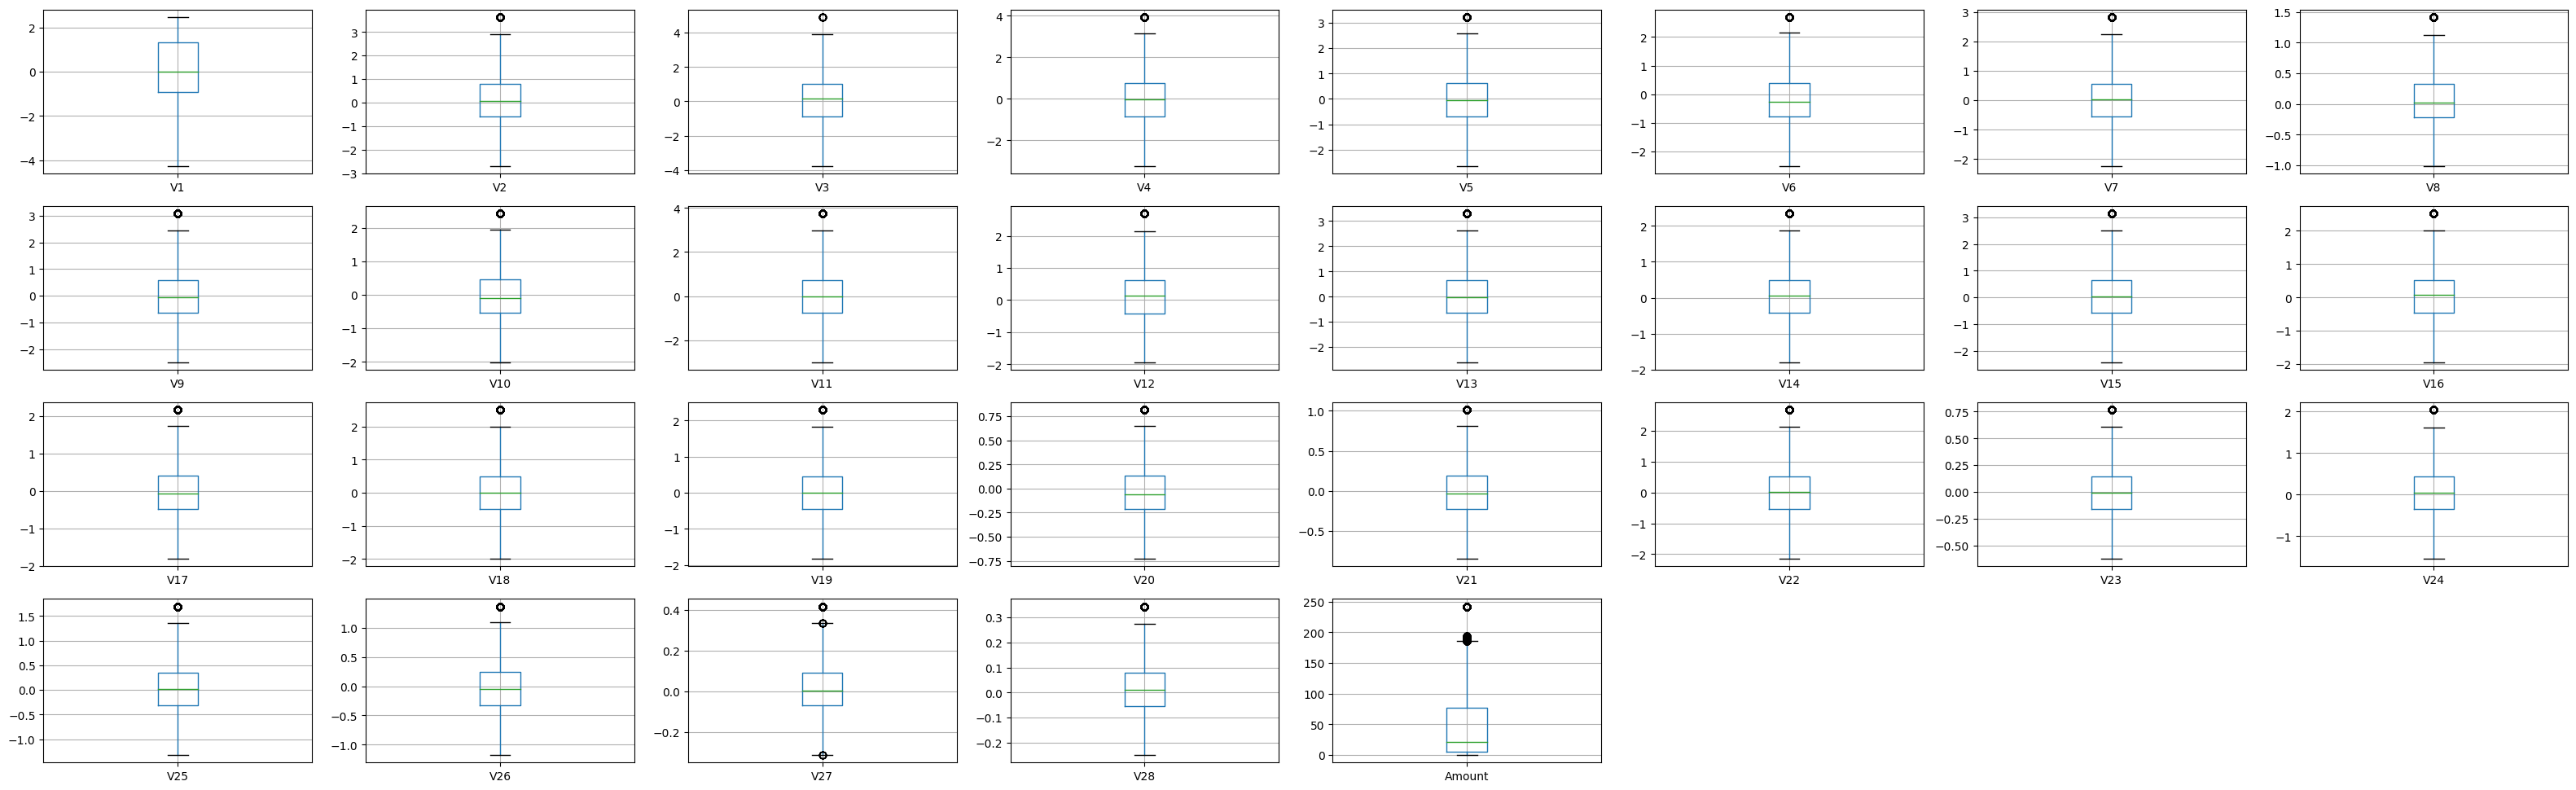

In [26]:
boxplot_for_outlier(X_train_outlier, numerical)

In [27]:
X_test[numerical] = X_test_outlier[numerical]
X_train[numerical] = X_train_outlier[numerical]
pd.options.mode.chained_assignment = None

## Feature Scaling

In [28]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,0.107248,0.078438,0.039525,0.002703,0.024730,-0.047421,0.025522,0.089823,0.002534,-0.015127,...,-0.011499,-0.004797,0.004053,0.005318,0.008392,0.009994,0.001694,0.023914,0.018046,58.073877
std,1.525851,1.111243,1.342095,1.361496,1.105248,1.088224,0.865299,0.491085,1.041146,0.838249,...,0.332657,0.328913,0.704706,0.271929,0.580336,0.489312,0.478803,0.167807,0.123192,76.043633
min,-4.263313,-2.695493,-3.761009,-3.234939,-2.641685,-2.515798,-2.236876,-1.011743,-2.505293,-2.017424,...,-0.729064,-0.849731,-2.147970,-0.625648,-1.547332,-1.321500,-1.178778,-0.313294,-0.249303,0.000000
25%,-0.915874,-0.599966,-0.888774,-0.848263,-0.690221,-0.767997,-0.553524,-0.209255,-0.644067,-0.535903,...,-0.211570,-0.228371,-0.542164,-0.161775,-0.355410,-0.317858,-0.327018,-0.070668,-0.052903,5.600000
50%,0.022127,0.062984,0.180299,-0.019471,-0.055569,-0.274176,0.039796,0.021771,-0.050717,-0.093338,...,-0.062294,-0.029413,0.007275,-0.011093,0.040762,0.016980,-0.052080,0.001381,0.011214,22.040000
75%,1.315803,0.797132,1.026191,0.743597,0.610982,0.398144,0.568756,0.325825,0.596893,0.451911,...,0.133454,0.186024,0.528677,0.147499,0.439321,0.351278,0.240921,0.091022,0.078117,77.700000
max,2.454930,3.615975,4.873299,3.914234,3.203482,2.684193,2.815219,1.410557,3.072916,2.417038,...,0.813737,1.009522,2.668671,0.764263,2.039271,1.693729,1.366037,0.417104,0.343299,242.248438


In [29]:
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,...,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000
mean,0.101225,0.084232,0.036431,-0.009836,0.032372,-0.050655,0.032901,0.091000,-0.004166,-0.013262,...,-0.011675,-0.003844,0.004615,0.006307,0.010292,0.008673,0.000781,0.024580,0.018656,57.669510
std,1.527068,1.113227,1.342884,1.357012,1.112744,1.093169,0.869524,0.491344,1.038605,0.838763,...,0.331060,0.328912,0.706492,0.271739,0.580713,0.488378,0.475212,0.168147,0.123239,75.642752
min,-4.261670,-2.695182,-3.760726,-3.235785,-2.640039,-2.514354,-2.236514,-1.010637,-2.504447,-2.017199,...,-0.727940,-0.849135,-2.144691,-0.625643,-1.547331,-1.320858,-1.178460,-0.313229,-0.249293,0.000000
25%,-0.916482,-0.601827,-0.892832,-0.859309,-0.688399,-0.772316,-0.548857,-0.207071,-0.644677,-0.534165,...,-0.211079,-0.228148,-0.544615,-0.161256,-0.350686,-0.315910,-0.325794,-0.070531,-0.052587,5.662500
50%,0.012310,0.068051,0.179563,-0.032832,-0.046076,-0.278755,0.044822,0.022441,-0.057539,-0.092519,...,-0.062511,-0.029678,0.004446,-0.011344,0.041936,0.013148,-0.052515,0.001841,0.011583,21.900000
75%,1.317141,0.810141,1.029320,0.725998,0.617292,0.390618,0.576886,0.325284,0.591469,0.460490,...,0.132336,0.186891,0.526606,0.148434,0.440820,0.348005,0.237785,0.092004,0.078976,77.000000
max,2.408046,3.615975,4.873299,3.914234,3.203482,2.684193,2.815219,1.410557,3.072916,2.417038,...,0.813737,1.009522,2.668671,0.764263,2.039271,1.693729,1.366037,0.417104,0.343299,242.248438


Feature scaling is for mapping all the feature variables onto the same scale.

In [30]:
cols = X_train.columns

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [32]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [33]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [34]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,0.650551,0.439506,0.440167,0.452869,0.456174,0.474689,0.447814,0.454760,0.449576,0.451531,...,0.465106,0.454448,0.446789,0.453961,0.433760,0.441590,0.463874,0.461678,0.451144,0.239729
std,0.227121,0.176067,0.155438,0.190441,0.189088,0.209274,0.171275,0.202735,0.186645,0.189031,...,0.215619,0.176906,0.146307,0.195645,0.161807,0.162280,0.188148,0.229747,0.207883,0.313908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.498261,0.332019,0.332654,0.333839,0.333859,0.336116,0.333199,0.331292,0.333660,0.334093,...,0.335425,0.334199,0.333387,0.333743,0.332326,0.332858,0.334704,0.332183,0.331419,0.023117
50%,0.637881,0.437058,0.456471,0.449768,0.442437,0.431082,0.450639,0.426667,0.440029,0.433894,...,0.432182,0.441209,0.447458,0.442154,0.442785,0.443907,0.442742,0.430827,0.439615,0.090981
75%,0.830443,0.553378,0.554439,0.556503,0.556471,0.560374,0.555340,0.552189,0.556126,0.556851,...,0.559060,0.557081,0.555708,0.556257,0.553909,0.554777,0.557879,0.553556,0.552513,0.320745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,...,56746.000000,56746.000000,56746.000000,56746.000000,5.674600e+04,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000
mean,0.649655,0.440425,0.439808,0.451116,0.457482,0.474067,0.449274,0.455246,0.448375,0.451952,...,0.464991,0.454961,0.446906,0.454673,4.342894e-01,0.441152,0.463515,0.462589,0.452174,0.238059
std,0.227302,0.176382,0.155529,0.189814,0.190370,0.210225,0.172111,0.202842,0.186190,0.189146,...,0.214584,0.176906,0.146677,0.195508,1.619118e-01,0.161971,0.186737,0.230212,0.207963,0.312253
min,0.000244,0.000049,0.000033,-0.000118,0.000282,0.000278,0.000072,0.000456,0.000152,0.000051,...,0.000729,0.000321,0.000681,0.000003,4.385247e-07,0.000213,0.000125,0.000090,0.000016,0.000000
25%,0.498171,0.331724,0.332184,0.332294,0.334171,0.335286,0.334123,0.332193,0.333551,0.334484,...,0.335744,0.334318,0.332878,0.334117,3.336434e-01,0.333504,0.335185,0.332371,0.331953,0.023375
50%,0.636420,0.437861,0.456385,0.447899,0.444061,0.430201,0.451634,0.426943,0.438806,0.434079,...,0.432041,0.441066,0.446871,0.441973,4.431124e-01,0.442636,0.442572,0.431457,0.440237,0.090403
75%,0.830642,0.555439,0.554802,0.554041,0.557551,0.558927,0.556949,0.551966,0.555154,0.558786,...,0.558335,0.557548,0.555278,0.556929,5.543274e-01,0.553691,0.556647,0.554901,0.553962,0.317856
max,0.993021,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000


## Models Nested Cross Validation
Performed feature selection and hyperparameter tuning simultaneously and use nested cross validation to mitigate overfitting

The performance metrics used to evaluate the models are accuracy, balanced accuracy, precision, recall, F1, PR-AUC, ROC-AUC, Cohen Kappa, Fit Time and Score Time.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import make_scorer, cohen_kappa_score

#from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
import pickle

from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold

import pickle

In [37]:
models =[]
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier()))
models.append(("K-Nearest Neighbors", KNeighborsClassifier())) 
models.append(("MLP Classifier", MLPClassifier())) 
models.append(("Gaussian Naive Bayes", GaussianNB())) 
models.append(("Bernoulli Naive Bayes", BernoulliNB())) 
models.append(("Multinomial Naive Bayes", MultinomialNB())) 
models.append(("SVC", SVC()))
models.append(("SGD Classifier", SGDClassifier()))
models.append(("Random Forest Classifier", RandomForestClassifier()))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier()))
models.append(("Ada Boost Classifier", AdaBoostClassifier()))

params = {'Logistic Regression' : {'model__penalty':['l1', 'l2'],
        'model__C':[0.1, 1, 10, 100],
        'model__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        },
        'Decision Tree Classifier' : {'model__criterion':['gini', 'entropy'],
        'model__max_depth': range(1,10),
        'model__min_samples_split': range(1,10),
        'model__min_samples_leaf' : range(1,5)
        },
        'K-Nearest Neighbors' : {'model__n_neighbors': range(1,30),
        'model__leaf_size': range(1,50),
        'model__p': (1,2),
        'model__weights': ('uniform', 'distance'),
        'model__metric': ('minkowski', 'chebyshev')
        },
        'MLP Classifier' : {'model__solver' : ['lbfgs', 'sgd', 'adam'], 
        'model__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'model__activation': ['logistic', 'tanh', 'relu'],
        'model__alpha': [0.0001, 0.05],
        'model__learning_rate': ['constant','adaptive']
        },
        'Gaussian Naive Bayes' : {'model__priors': [None, [0.1,]* 2,], # 2 used for multiplication is the number of classes
        'model__var_smoothing': [1e-9, 1e-6, 1e-12]
        },
        'Bernoulli Naive Bayes' : {'model__alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
        'model__fit_prior': [True, False],
        'model__class_prior': [None, [0.1,]* 2, ], # 2 used for multiplication is the number of classes
        'model__binarize': [None, 0.0, 8.5, 10.0]
        },
        'Multinomial Naive Bayes' : {'model__alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
        'model__fit_prior': [True, False],
        'model__class_prior': [None, [0.1,]* 2, ] # 2 used for multiplication is the number of classes
        },
        'SVC' : {'model__gamma':[0.5, 1, 2, 10],
        'model__C':[0.1, 1, 10, 100],
        'model__kernel':['linear', 'rbf', 'poly', 'sigmoid']
        },
        'SGD Classifier' : {'model__loss' : ['hinge', 'log', 'squared_hinge', 'modified_huber'],
        'model__alpha' : [0.0001, 0.001, 0.01, 0.1],
        'model__penalty' : ['l2', 'l1', 'none']
        },
        'Random Forest Classifier' : {'model__n_estimators': [200, 500],
        'model__max_features': ['auto', 'sqrt', 'log2'],
        'model__max_depth' : [4,5,6,7,8],
        'model__criterion' :['gini', 'entropy']
        },
        'Gradient Boosting Classifier' : {'model__loss':['deviance', 'exponential'],
        'model__learning_rate':[0.05, 0.1, 0.2],
        'model__n_estimators':[50, 100, 150],
        'model__criterion':['friedman_mse', 'mse'],
        'model__min_samples_split':[0.1, 1, 10],
        'model__min_samples_leaf':[0.1, 0.5, 1, 5],
        'model__max_depth':[3, 5, 8],
        'model__max_features':['log2', 'sqrt']
        },
        'Ada Boost Classifier' : {'model__n_estimators':[10, 50, 100, 500, 1000],
        'model__learning_rate':[.001, 0.01, 0.1, 1.0]
        },
        'selector' : {'selector__k' : range(1, 30)
        }
}

scoring = {'accuracy': 'accuracy',
          'balanced_accuracy': 'balanced_accuracy',
          'precision_macro': 'precision_macro',
          'recall_macro': 'recall_macro',
          'f1_macro': 'f1_macro',
          'average_precision': 'average_precision',
          'roc_auc': 'roc_auc',
          'cohen_kappa': make_scorer(cohen_kappa_score)}

In [38]:
import csv

inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

best_features_list = {}
models_tuned = {}

for name, model in models:
  pipe = Pipeline([('selector', SelectKBest(mutual_info_classif, k=5)), ('model', model)])
  search_space = []
  search_space.append(params['selector'])
  search_space.append(params[name])
  search_space
  clf = RandomizedSearchCV(pipe, search_space,
                             n_jobs=-1, refit='cohen_kappa', cv=inner_cv,
                             scoring=scoring, random_state=42)
  clf.fit(X_train, y_train)
  features = X_train.columns[clf.best_estimator_.named_steps['selector'].get_support()]
  best_features_list[name] = features
  models_tuned[name] = clf.best_estimator_[1]

  # save the tuned model to disk
  filename = name
  outfile = open(filename, 'wb')
  pickle.dump(clf, outfile)
  outfile.close()

In [39]:
# save the best feature list
features_list = csv.writer(open("best_features_list.csv", "w"))

for key, val in best_features_list.items():
        features_list.writerow([key, val])

# save the models_tuned list
outfile = open('models_tuned', 'wb')
pickle.dump(models_tuned, outfile)
outfile.close()

In [40]:
# # load models_tune list
# models_tuned = pickle.load(open('models_tuned', 'rb'))
    
# # load the model from disk
# loaded_model_list=[]
# for model in models:
#   filename = model[0]
#   loaded_model = pickle.load(open(filename, 'rb'))
#   loaded_model_list.append((model[0], loaded_model))

In [41]:
print(best_features_list)

{'Logistic Regression': MultiIndex([(    'V1',),
            (    'V2',),
            (    'V3',),
            (    'V4',),
            (    'V5',),
            (    'V6',),
            (    'V7',),
            (    'V8',),
            (    'V9',),
            (   'V10',),
            (   'V11',),
            (   'V12',),
            (   'V14',),
            (   'V16',),
            (   'V17',),
            (   'V18',),
            (   'V19',),
            (   'V20',),
            (   'V21',),
            (   'V23',),
            (   'V27',),
            (   'V28',),
            ('Amount',)],
           ), 'Decision Tree Classifier': MultiIndex([( 'V3',),
            ('V10',),
            ('V11',),
            ('V14',),
            ('V17',)],
           ), 'K-Nearest Neighbors': MultiIndex([( 'V3',),
            ('V10',),
            ('V11',),
            ('V14',),
            ('V17',)],
           ), 'MLP Classifier': MultiIndex([(    'V1',),
            (    'V2',),
            (    

In [42]:
print(models_tuned)

{'Logistic Regression': LogisticRegression(), 'Decision Tree Classifier': DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=6), 'K-Nearest Neighbors': KNeighborsClassifier(leaf_size=24, n_neighbors=7, p=1, weights='distance'), 'MLP Classifier': MLPClassifier(), 'Gaussian Naive Bayes': GaussianNB(), 'Bernoulli Naive Bayes': BernoulliNB(alpha=0.01, binarize=None, fit_prior=False), 'Multinomial Naive Bayes': MultinomialNB(alpha=0.01, class_prior=[0.1, 0.1]), 'SVC': SVC(), 'SGD Classifier': SGDClassifier(), 'Random Forest Classifier': RandomForestClassifier(), 'Gradient Boosting Classifier': GradientBoostingClassifier(criterion='mse', learning_rate=0.05,
                           loss='exponential', max_depth=5, max_features='log2',
                           min_samples_split=10), 'Ada Boost Classifier': AdaBoostClassifier()}


In [43]:
scores_accuracy = []
scores_balanced_accuracy = []
scores_precision = []
scores_recall = []
scores_f1 = []
scores_average_precision = []
scores_roc_auc = []
scores_cohen_kappa = []
fit_time = []
score_time = []

for name, model in models_tuned.items():
  score = cross_validate(model, X_train[best_features_list[name]], y_train, cv=outer_cv, scoring=scoring, n_jobs=-1, return_train_score=False)
  scores_accuracy.append(score['test_accuracy'].mean())
  scores_balanced_accuracy.append(score['test_balanced_accuracy'].mean())
  scores_precision.append(score['test_precision_macro'].mean())
  scores_recall.append(score['test_recall_macro'].mean())
  scores_f1.append(score['test_f1_macro'].mean())
  scores_average_precision.append(score['test_average_precision'].mean())
  scores_roc_auc.append(score['test_roc_auc'].mean())
  scores_cohen_kappa.append(score['test_cohen_kappa'].mean())
  fit_time.append(score['fit_time'].mean())
  score_time.append(score['score_time'].mean())

performance = pd.DataFrame({
    'Model': [name for name in models_tuned],
    'Accuracy': scores_accuracy,
    'Balanced Accuracy': scores_balanced_accuracy,
    'Precision': scores_precision,
    'Recall': scores_recall,
    'F1': scores_f1,
    'PR-AUC': scores_average_precision,
    'ROC-AUC': scores_roc_auc,
    'Cohen Kappa': scores_cohen_kappa,
    'Fit Time': fit_time,
    'Score Time': score_time
  })

In [44]:
performance.to_csv('performance1.csv')

In [45]:
display(performance)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time
0,Logistic Regression,0.999366,0.866576,0.939170,0.866576,0.898147,0.787867,0.978654,0.796298,9.224940,0.148004
1,Decision Tree Classifier,0.999344,0.875794,0.923551,0.875794,0.896730,0.665295,0.920514,0.793462,5.415124,0.081781
2,K-Nearest Neighbors,0.999344,0.886033,0.916021,0.886033,0.899714,0.706888,0.903948,0.799429,2.613412,15.668017
3,MLP Classifier,0.999388,0.882013,0.931819,0.882013,0.904107,0.813204,0.979015,0.808216,46.612994,0.204753
4,Gaussian Naive Bayes,0.998846,0.910337,0.813502,0.910337,0.854391,0.696577,0.972121,0.708796,1.003616,0.327626
5,Bernoulli Naive Bayes,0.992277,0.909606,0.579944,0.909606,0.632075,0.695032,0.938732,0.265941,0.316454,0.194879
6,Multinomial Naive Bayes,0.986871,0.910738,0.549969,0.910738,0.586088,0.677969,0.944176,0.176293,0.300995,0.195577
7,SVC,0.999414,0.895128,0.929186,0.895128,0.910075,0.732134,0.907159,0.820151,815.209275,13.157328
8,SGD Classifier,0.999401,0.893842,0.926511,0.893842,0.908193,0.696484,0.928006,0.816388,2.420728,0.207545
9,Random Forest Classifier,0.999515,0.882279,0.970222,0.882279,0.920726,0.831252,0.941336,0.841456,276.002687,0.912461


## Shortlisting Best Models

To shortlist the best models, we compare the performance of the models based on balanced accuracy, F1, PR-AUC, ROC-AUC, Cohen's Kappa score and Fit Time.

- Balanced Accuracy, F1, PR-AUC, ROC-AUC, Cohen's Kappa scores are used because they are more appropriate to evaluate the performance of models on an imbalanced dataset.

In [46]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [47]:
balanced_accuracy_scores = performance['Balanced Accuracy']
f1_scores = performance['F1']
pr_auc_scores = performance['PR-AUC']
roc_auc_scores = performance['ROC-AUC']
coh_kap_scores = performance['Cohen Kappa']
tt = performance['Fit Time']

model_data = {'Model': ['Logistic Regression','Decision Tree Classifier','K-Nearest Neighbors',
                        'MLP Classifier','Gaussian Naive Bayes','Bernoulli Naive Bayes',
                        'Multinomial Naive Bayes', 'SVC', 'SGD Classifier',
                        'Random Forest Classifier', 'Gradient Boosting Classifier', 'Ada Boost Classifier'],
              'Balanced Accuracy': balanced_accuracy_scores,
              'F1' : f1_scores,
              'PR_AUC': pr_auc_scores,
              'ROC_AUC' : roc_auc_scores,
              'Cohen Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

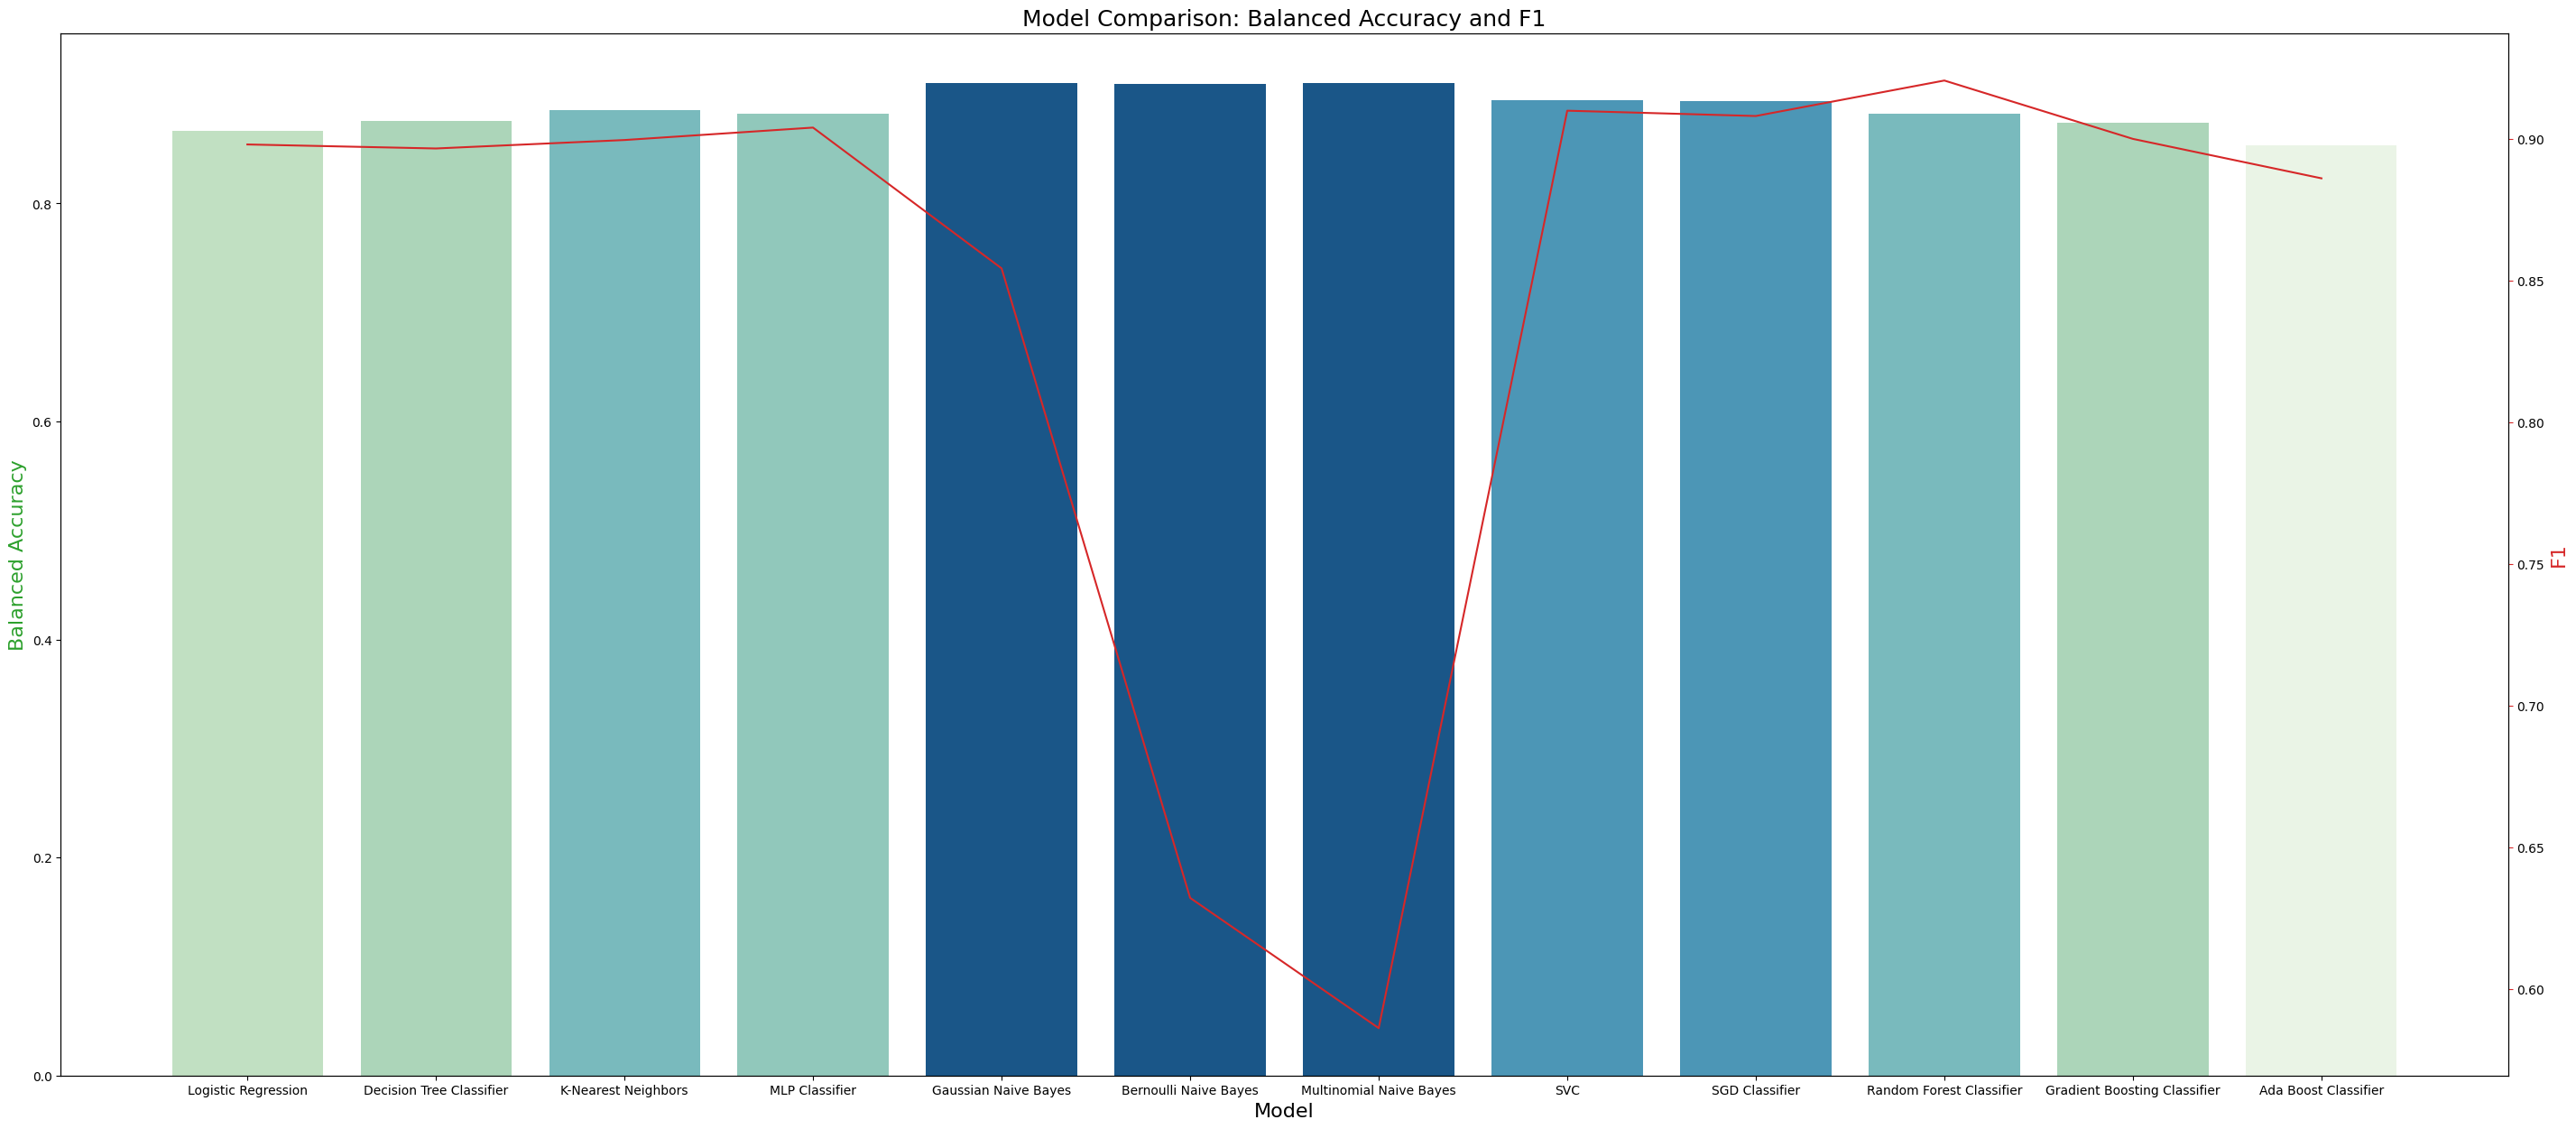

In [48]:
fig, ax1 = plt.subplots(figsize=(35,15))
ax1.set_title('Model Comparison: Balanced Accuracy and F1', fontsize=18)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=16)
ax1.set_ylabel('Balanced Accuracy', fontsize=16, color=color)
ax2 = sns.barplot(x='Model', y='Balanced Accuracy', data = data, palette=colors_from_values(data['Balanced Accuracy'], "GnBu"))
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('F1', fontsize=16, color=color)
ax2 = sns.lineplot(x='Model', y='F1', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

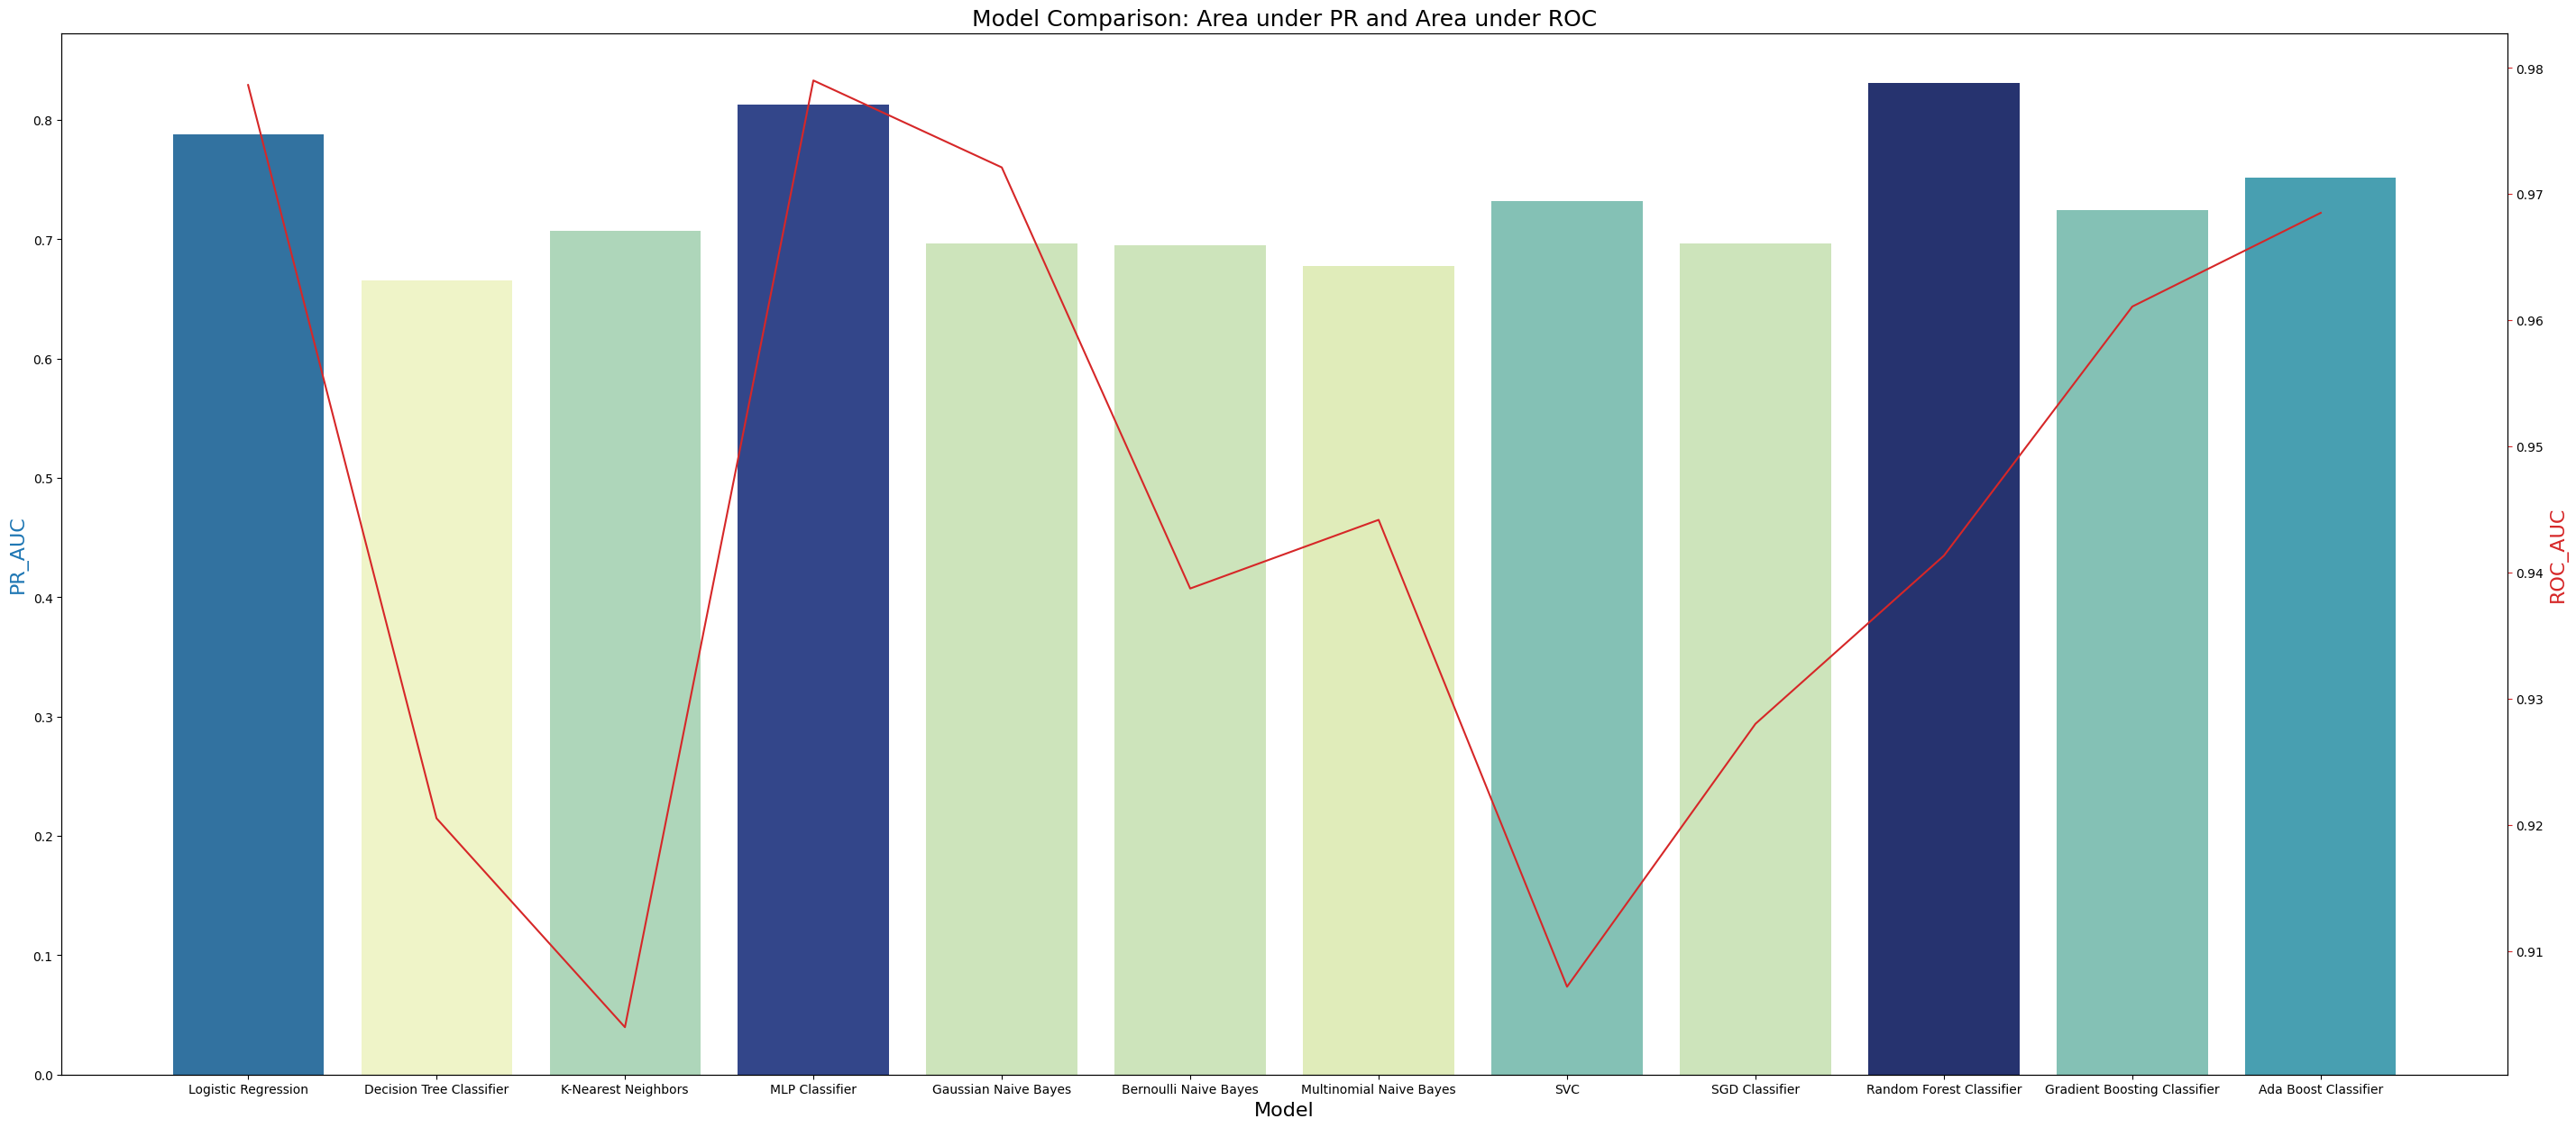

In [49]:
fig, ax3 = plt.subplots(figsize=(35,15))
ax3.set_title('Model Comparison: Area under PR and Area under ROC', fontsize=18)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=16)
ax3.set_ylabel('PR_AUC', fontsize=16, color=color)
ax4 = sns.barplot(x='Model', y='PR_AUC', data = data, palette=colors_from_values(data['PR_AUC'], "YlGnBu"))
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('ROC_AUC', fontsize=16, color=color)
ax4 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

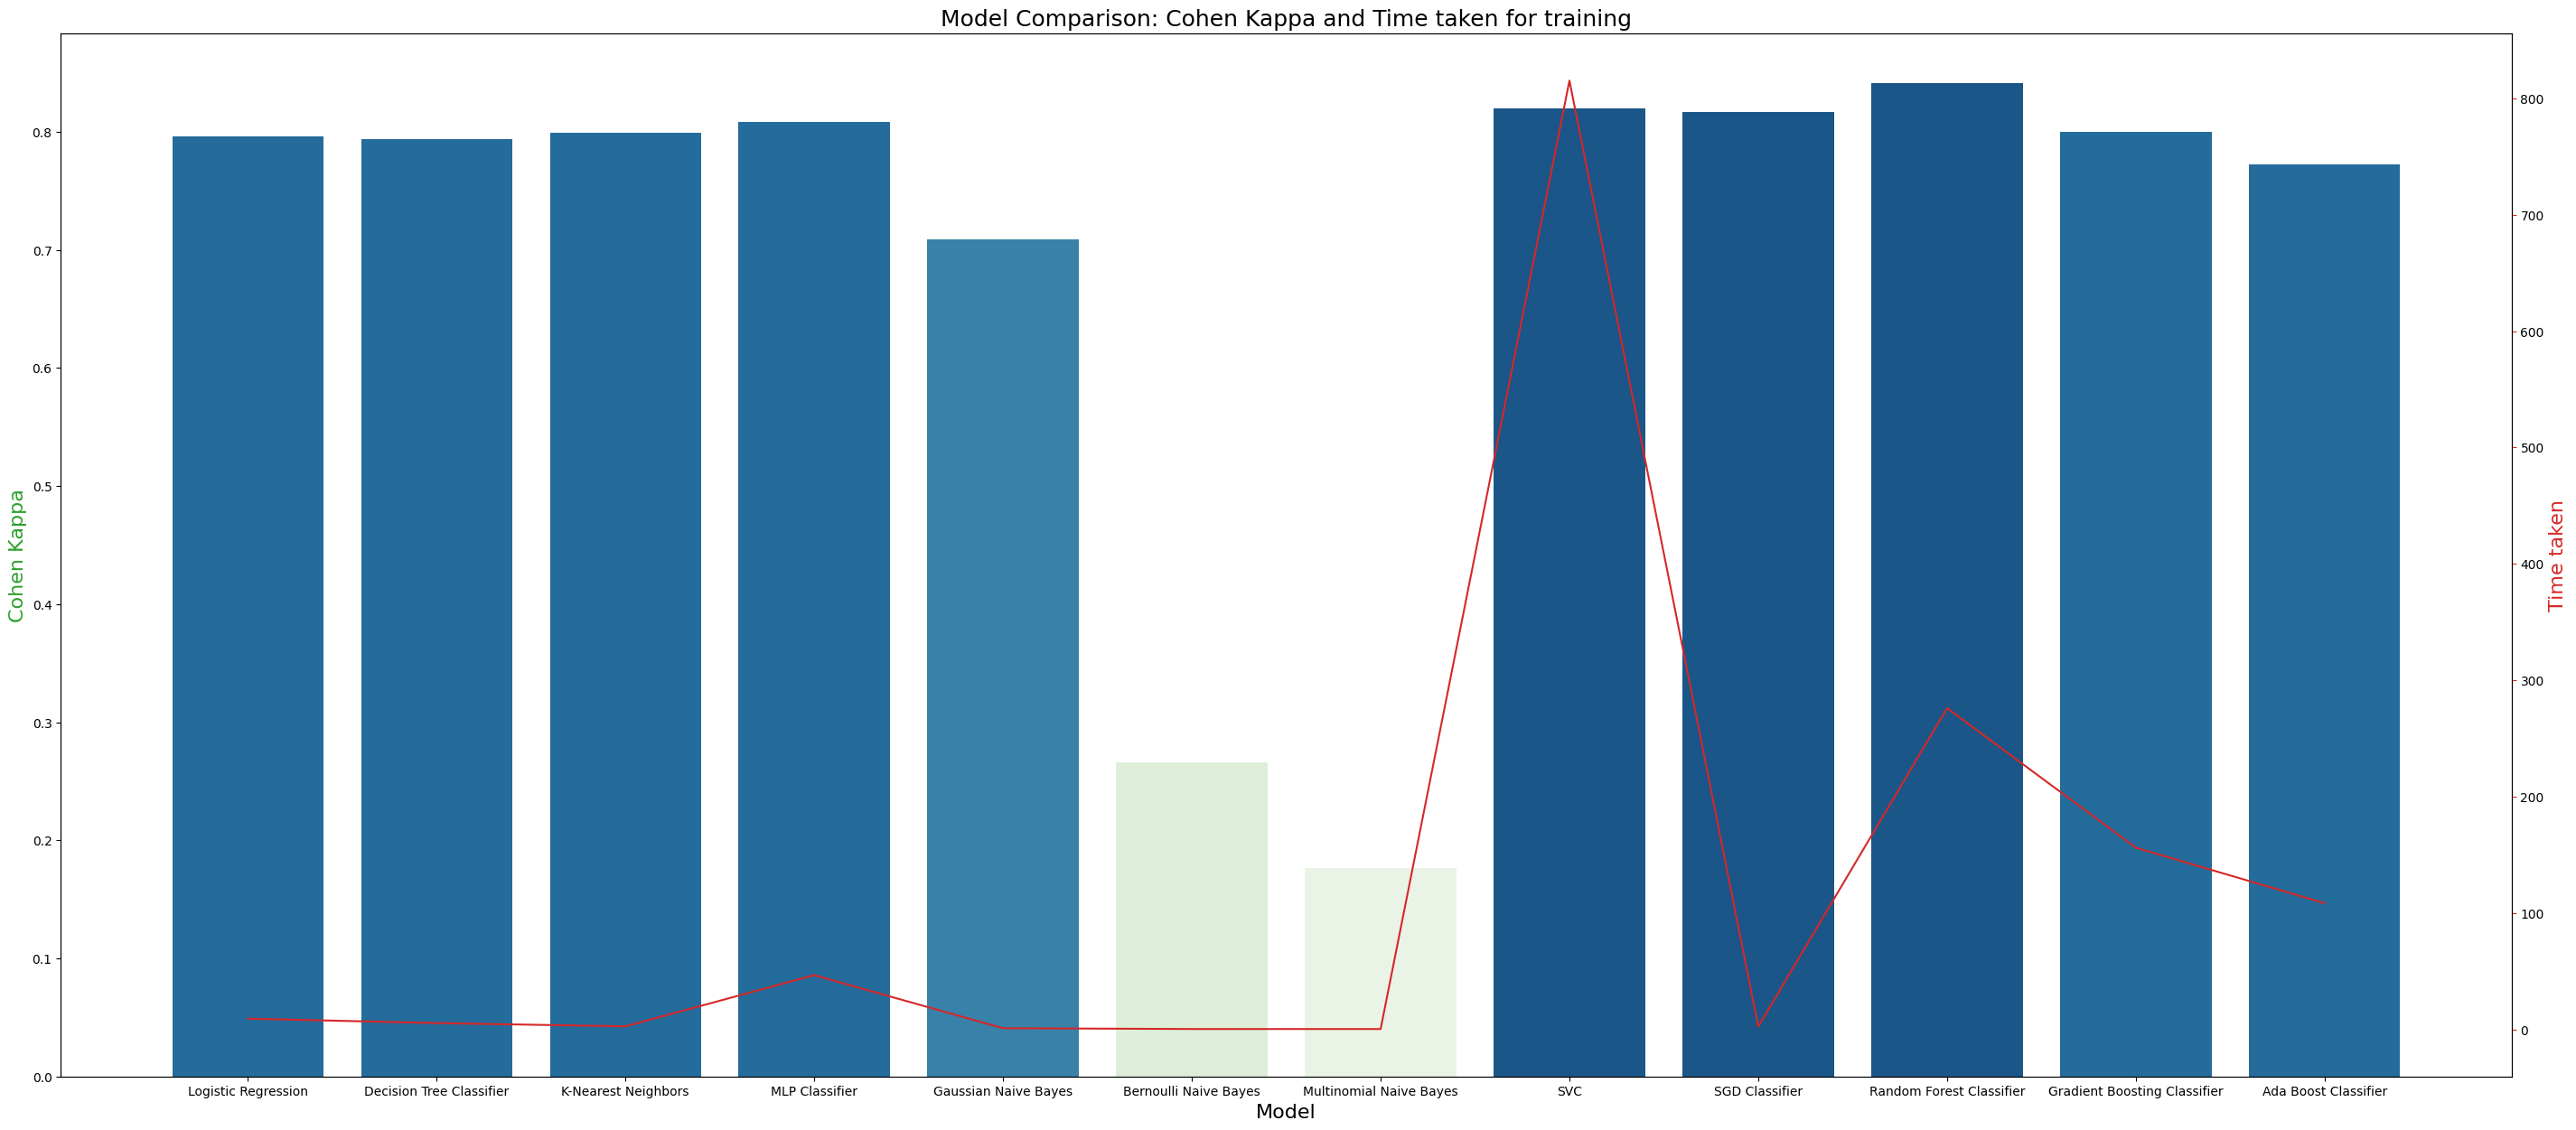

In [50]:
fig, ax5 = plt.subplots(figsize=(35,15))
ax5.set_title('Model Comparison: Cohen Kappa and Time taken for training', fontsize=18)
color = 'tab:green'
ax5.set_xlabel('Model', fontsize=16)
ax5.set_ylabel('Balanced Accuracy', fontsize=16, color=color)
ax6 = sns.barplot(x='Model', y='Cohen Kappa', data = data, palette=colors_from_values(data['Cohen Kappa'], "GnBu"))
ax5.tick_params(axis='y')
ax6 = ax5.twinx()
color = 'tab:red'
ax6.set_ylabel('Time taken', fontsize=16, color=color)
ax6 = sns.lineplot(x='Model', y='Time taken', data = data, sort=False, color=color)
ax6.tick_params(axis='y', color=color)

Learning curve is used to compare the performance of the models on training and testing data over a varying number of training instances.

In [51]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_comb = pd.concat([X_train, X_test], axis=0)
y_comb = pd.concat([y_train, y_test], axis=0)

In [69]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(name, model):

    train_sizes = [range(1, 250000, 20000)]
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_comb[best_features_list[name]], y_comb, train_sizes = train_sizes, 
        cv = 10, n_jobs=-1, scoring = 'balanced_accuracy')
        
    train_scores_mean = train_scores.mean(axis = 1)   
    validation_scores_mean = validation_scores.mean(axis = 1)
        
    plt.plot(train_sizes, train_scores_mean, label='Training')
    plt.plot(train_sizes, validation_scores_mean, label='Validation')
        
    plt.ylabel('Balanced Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curve for '+ name
    plt.title(title, fontsize=14, y=1.05)
    plt.legend()
    plt.ylim(0,1.0)

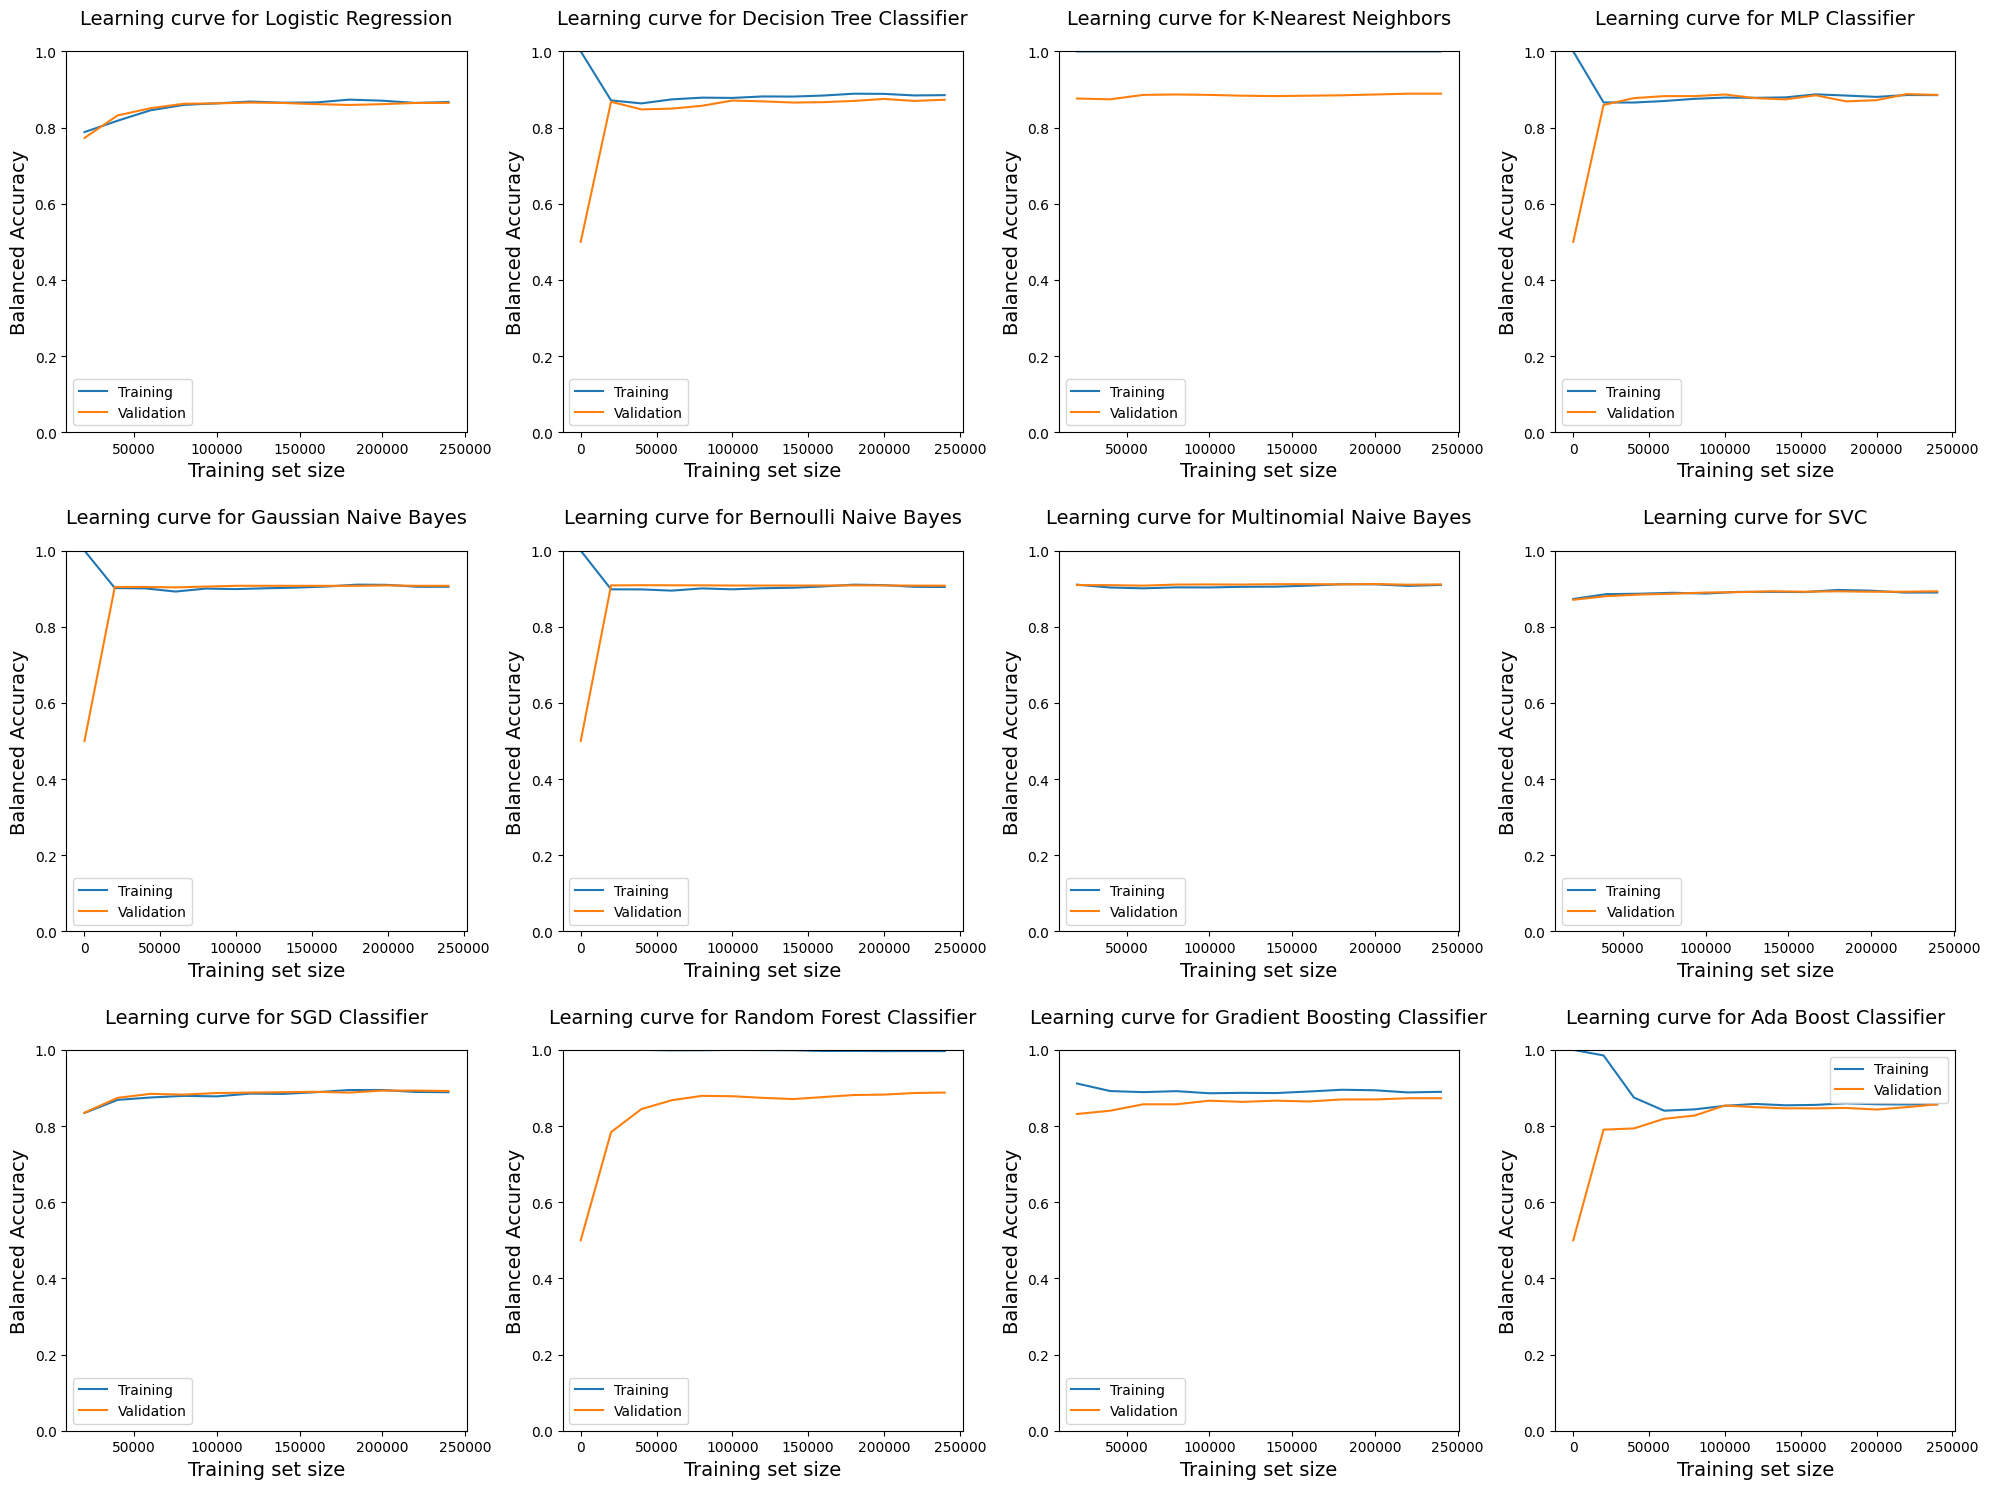

In [70]:
n_rows = (len(models_tuned) // 4) + (len(models_tuned) % 4 > 0)
n_columns = 4
index = 1

plt.figure(figsize=(5*n_columns,5*n_rows))

for name, model in models_tuned.items():
    plt.subplot(n_rows, n_columns, index)
    plt.tight_layout(h_pad=2)
    plot_learning_curve(name, model)
    index = index + 1

In [71]:
performance["Rank"] = performance[['F1', 'PR-AUC', 'ROC-AUC', 'Cohen Kappa']].apply(tuple,axis=1)\
             .rank(method='dense',ascending=False).astype(int)

performance.sort_values("Rank")

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time,Rank
9,Random Forest Classifier,0.999515,0.882279,0.970222,0.882279,0.920726,0.831252,0.941336,0.841456,276.002687,0.912461,1
7,SVC,0.999414,0.895128,0.929186,0.895128,0.910075,0.732134,0.907159,0.820151,815.209275,13.157328,2
8,SGD Classifier,0.999401,0.893842,0.926511,0.893842,0.908193,0.696484,0.928006,0.816388,2.420728,0.207545,3
3,MLP Classifier,0.999388,0.882013,0.931819,0.882013,0.904107,0.813204,0.979015,0.808216,46.612994,0.204753,4
10,Gradient Boosting Classifier,0.999374,0.874428,0.932874,0.874428,0.900115,0.724151,0.961090,0.800233,156.078369,0.205551,5
2,K-Nearest Neighbors,0.999344,0.886033,0.916021,0.886033,0.899714,0.706888,0.903948,0.799429,2.613412,15.668017,6
0,Logistic Regression,0.999366,0.866576,0.939170,0.866576,0.898147,0.787867,0.978654,0.796298,9.224940,0.148004,7
1,Decision Tree Classifier,0.999344,0.875794,0.923551,0.875794,0.896730,0.665295,0.920514,0.793462,5.415124,0.081781,8
11,Ada Boost Classifier,0.999295,0.853540,0.928627,0.853540,0.886190,0.751991,0.968517,0.772385,108.405609,0.798266,9
4,Gaussian Naive Bayes,0.998846,0.910337,0.813502,0.910337,0.854391,0.696577,0.972121,0.708796,1.003616,0.327626,10


## Stacking The Best Models

- Based on the evalution of the 12 models, the SVC, SGD Classifier and the MLP Classifier models were chosen as the 3 best performing models with least overfitting.
- These models were chosen to stack in an attempt to generate a potentially better performing model.

In [72]:
from sklearn.ensemble import StackingClassifier 

def init_stacking():
    level0 = []
    level0.append(('MLP Classifier', models_tuned['MLP Classifier']))
    level0.append(('SGD Classifier', models_tuned['SGD Classifier']))
    level1 = models_tuned['SVC']
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1)
    
    return model 

def init_stacking2():
    level0 = []
    level0.append(('MLP Classifier', models_tuned['MLP Classifier']))
    level0.append(('SVC', models_tuned['SVC']))
    
    level1 = models_tuned['SGD Classifier']
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1)
    
    return model 

def init_stacking3():
    level0 = []
    level0.append(('SGD Classifier', models_tuned['SGD Classifier']))
    level0.append(('SVC', models_tuned['SVC']))

    level1 = models_tuned['MLP Classifier']
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1)
    
    return model 

In [73]:
models_stacking=[]
models_stacking.append(('SVC', models_tuned['SVC']))
models_stacking.append(('SGD Classifier', models_tuned['SGD Classifier']))
models_stacking.append(('MLP Classifier', models_tuned['MLP Classifier']))
models_stacking.append(('StackedClassifier1', init_stacking()))
models_stacking.append(('StackedClassifier2', init_stacking2()))
models_stacking.append(('StackedClassifier3', init_stacking3()))

best_features_list['StackedClassifier1'] = best_features_list['SVC']
best_features_list['StackedClassifier2'] = best_features_list['SGD Classifier']
best_features_list['StackedClassifier3'] = best_features_list['MLP Classifier']

In [74]:
def evaluate_models(model_list, X_data):
  
  cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

  scoring = {'accuracy': 'accuracy',
            'balanced_accuracy': 'balanced_accuracy',
            'precision_macro': 'precision_macro',
            'recall_macro': 'recall_macro',
            'f1_macro': 'f1_macro',
            'average_precision': 'average_precision',
            'roc_auc': 'roc_auc',
            'cohen_kappa': make_scorer(cohen_kappa_score)}

  scores_accuracy = []
  scores_balanced_accuracy = []
  scores_precision = []
  scores_recall = []
  scores_f1 = []
  scores_average_precision = []
  scores_roc_auc = []
  scores_cohen_kappa = []
  fit_time = []
  score_time = []

  for name, model in model_list:
    score = cross_validate(model, X_data[best_features_list[name]], y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    scores_accuracy.append(score['test_accuracy'].mean())
    scores_balanced_accuracy.append(score['test_balanced_accuracy'].mean())
    scores_precision.append(score['test_precision_macro'].mean())
    scores_recall.append(score['test_recall_macro'].mean())
    scores_f1.append(score['test_f1_macro'].mean())
    scores_average_precision.append(score['test_average_precision'].mean())
    scores_roc_auc.append(score['test_roc_auc'].mean())
    scores_cohen_kappa.append(score['test_cohen_kappa'].mean())
    fit_time.append(score['fit_time'].mean())
    score_time.append(score['score_time'].mean())

  performance = pd.DataFrame({
      'Model': [model[0] for model in model_list],
      'Accuracy': scores_accuracy,
      'Balanced Accuracy': scores_balanced_accuracy,
      'Precision': scores_precision,
      'Recall': scores_recall,
      'F1': scores_f1,
      'PR-AUC': scores_average_precision,
      'ROC-AUC': scores_roc_auc,
      'Cohen Kappa': scores_cohen_kappa,
      'Fit Time': fit_time,
      'Score Time': score_time
    })

  return performance

In [75]:
performance2 = evaluate_models(models_stacking, X_train)

In [76]:
performance2.to_csv('performance_with_stacking.csv')

In [77]:
display(performance2)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time
0,SVC,0.999414,0.895128,0.929186,0.895128,0.910075,0.732134,0.907159,0.820151,750.240949,13.377140
1,SGD Classifier,0.999401,0.893842,0.926511,0.893842,0.908193,0.696806,0.928485,0.816388,2.186654,0.167054
2,MLP Classifier,0.999396,0.886025,0.932178,0.886025,0.905956,0.811319,0.978142,0.811915,44.125443,0.311268
3,StackedClassifier1,0.999401,0.897715,0.923750,0.897715,0.909033,0.697622,0.868207,0.818067,331.467418,4.953957
4,StackedClassifier2,0.999440,0.893828,0.937757,0.893828,0.913245,0.811808,0.936575,0.826491,2613.324426,48.825730
5,StackedClassifier3,0.999423,0.889946,0.936066,0.889946,0.910435,0.781418,0.930158,0.820871,2046.190195,40.349039


## Model Evaluation

In [ ]:
balanced_accuracy_scores = performance2['Balanced Accuracy']
f1_scores = performance2['F1']
pr_auc_scores = performance2['PR-AUC']
roc_auc_scores = performance2['ROC-AUC']
coh_kap_scores = performance2['Cohen Kappa']
tt = performance2['Fit Time']

model_data = {'Model': ['SVC', 'SGD Classifier', 'MLP Classifier', 'StackedClassifier1', 'StackedClassifier2', 'StackedClassifier3'],
              'Balanced Accuracy': balanced_accuracy_scores,
              'F1' : f1_scores,
              'PR_AUC': pr_auc_scores,
              'ROC_AUC' : roc_auc_scores,
              'Cohen Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

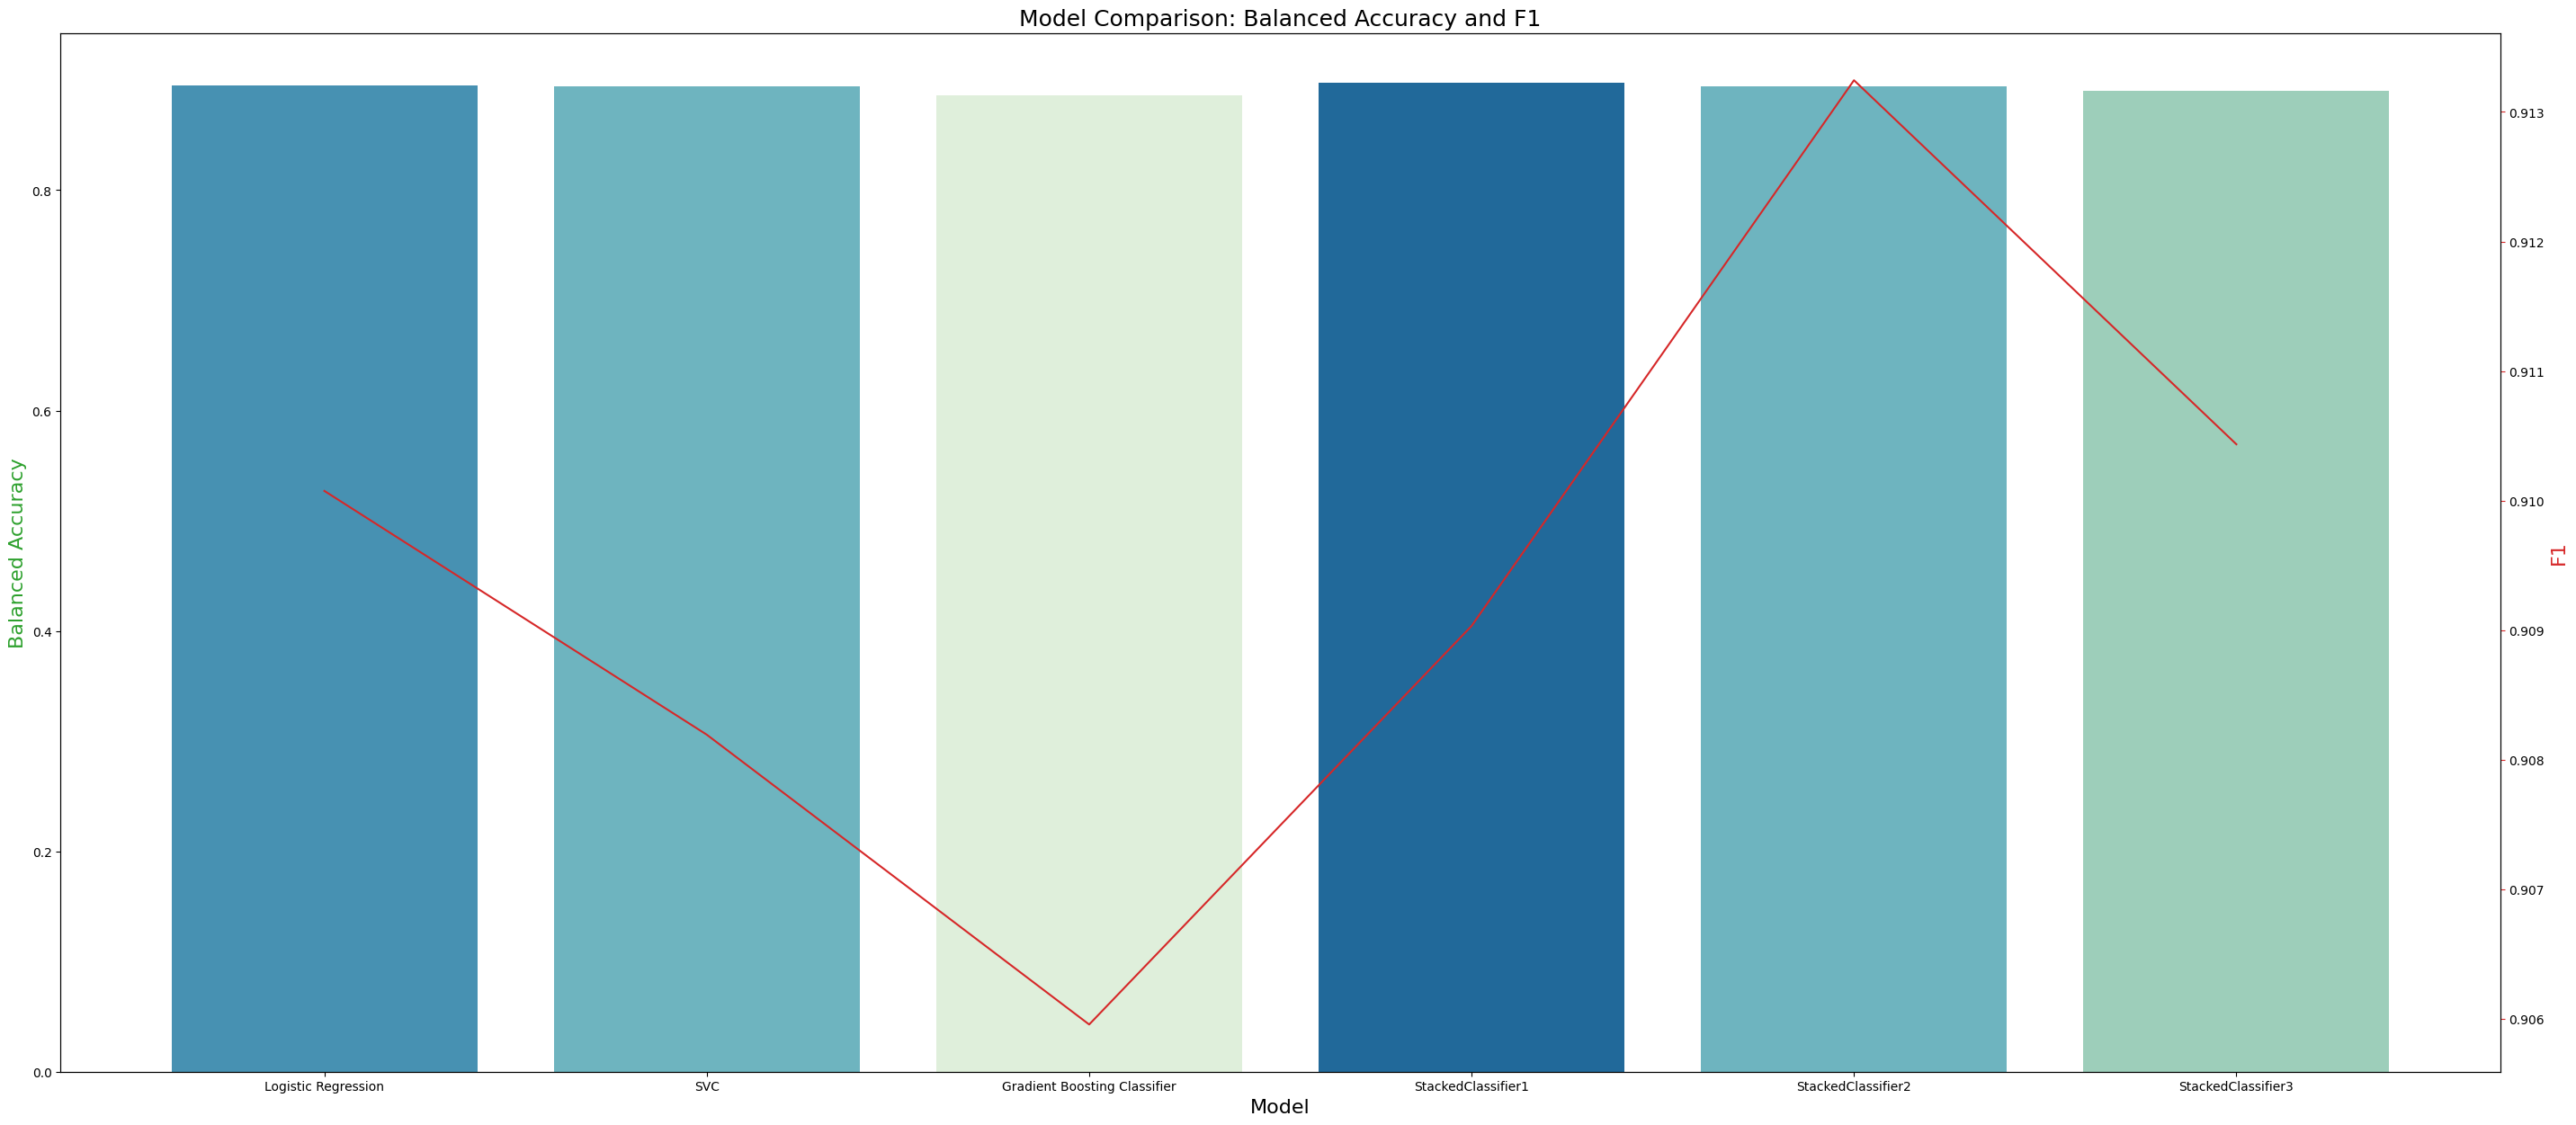

In [ ]:
fig, ax1 = plt.subplots(figsize=(35,15))
ax1.set_title('Model Comparison: Balanced Accuracy and F1', fontsize=18)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=16)
ax1.set_ylabel('Balanced Accuracy', fontsize=16, color=color)
ax2 = sns.barplot(x='Model', y='Balanced Accuracy', data = data, palette=colors_from_values(data['Balanced Accuracy'], "GnBu"))
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('F1', fontsize=16, color=color)
ax2 = sns.lineplot(x='Model', y='F1', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

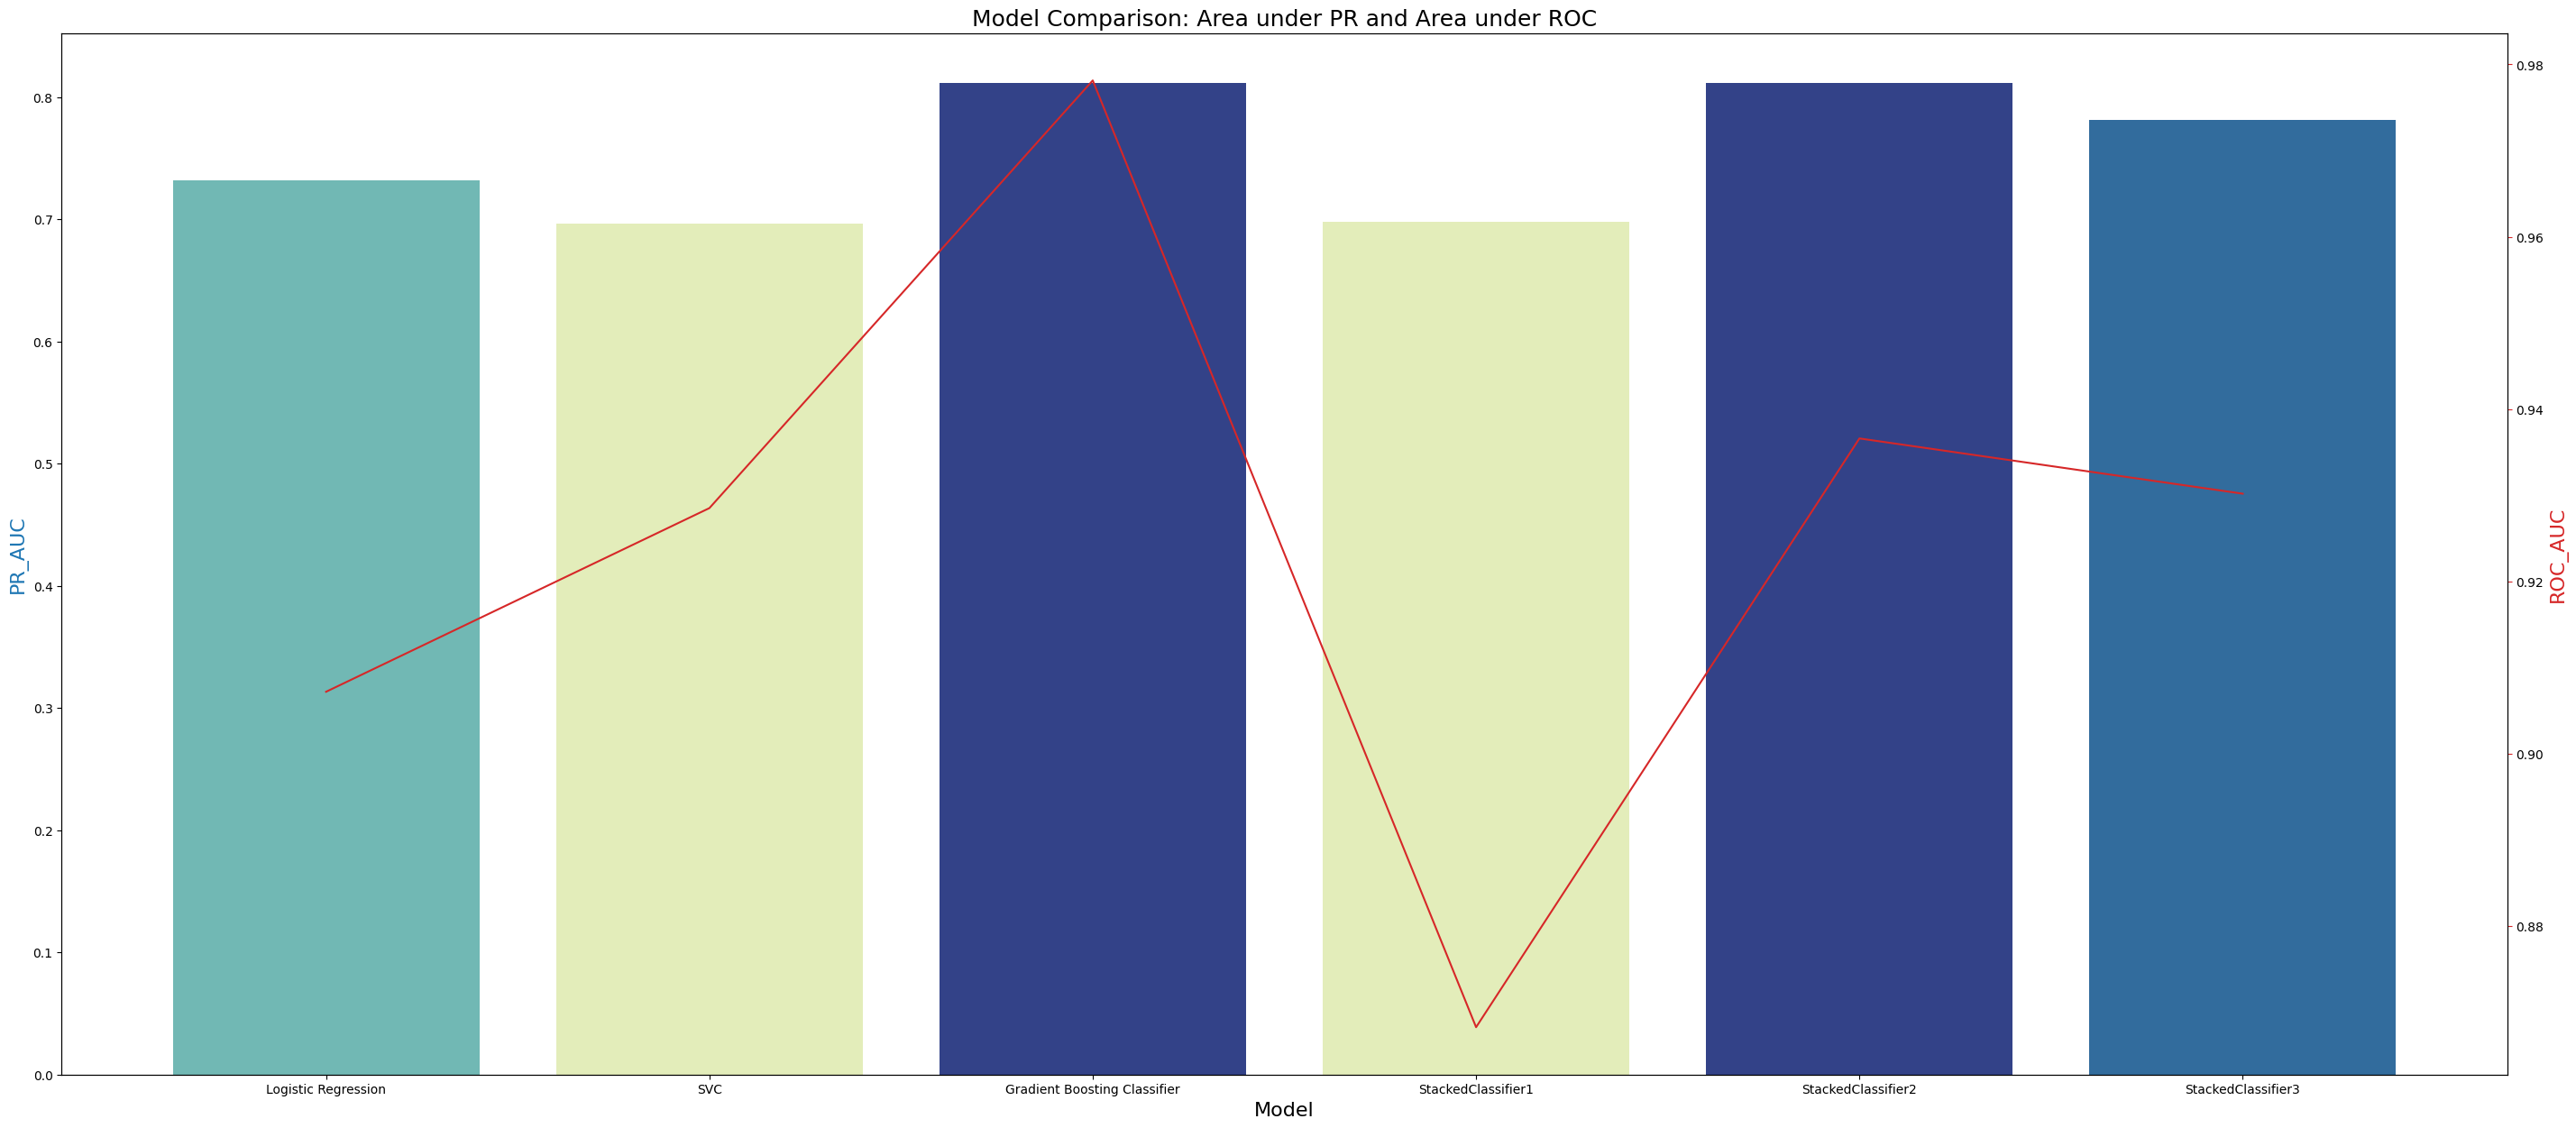

In [ ]:
fig, ax3 = plt.subplots(figsize=(35,15))
ax3.set_title('Model Comparison: Area under PR and Area under ROC', fontsize=18)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=16)
ax3.set_ylabel('PR_AUC', fontsize=16, color=color)
ax4 = sns.barplot(x='Model', y='PR_AUC', data = data, palette=colors_from_values(data['PR_AUC'], "YlGnBu"))
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('ROC_AUC', fontsize=16, color=color)
ax4 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

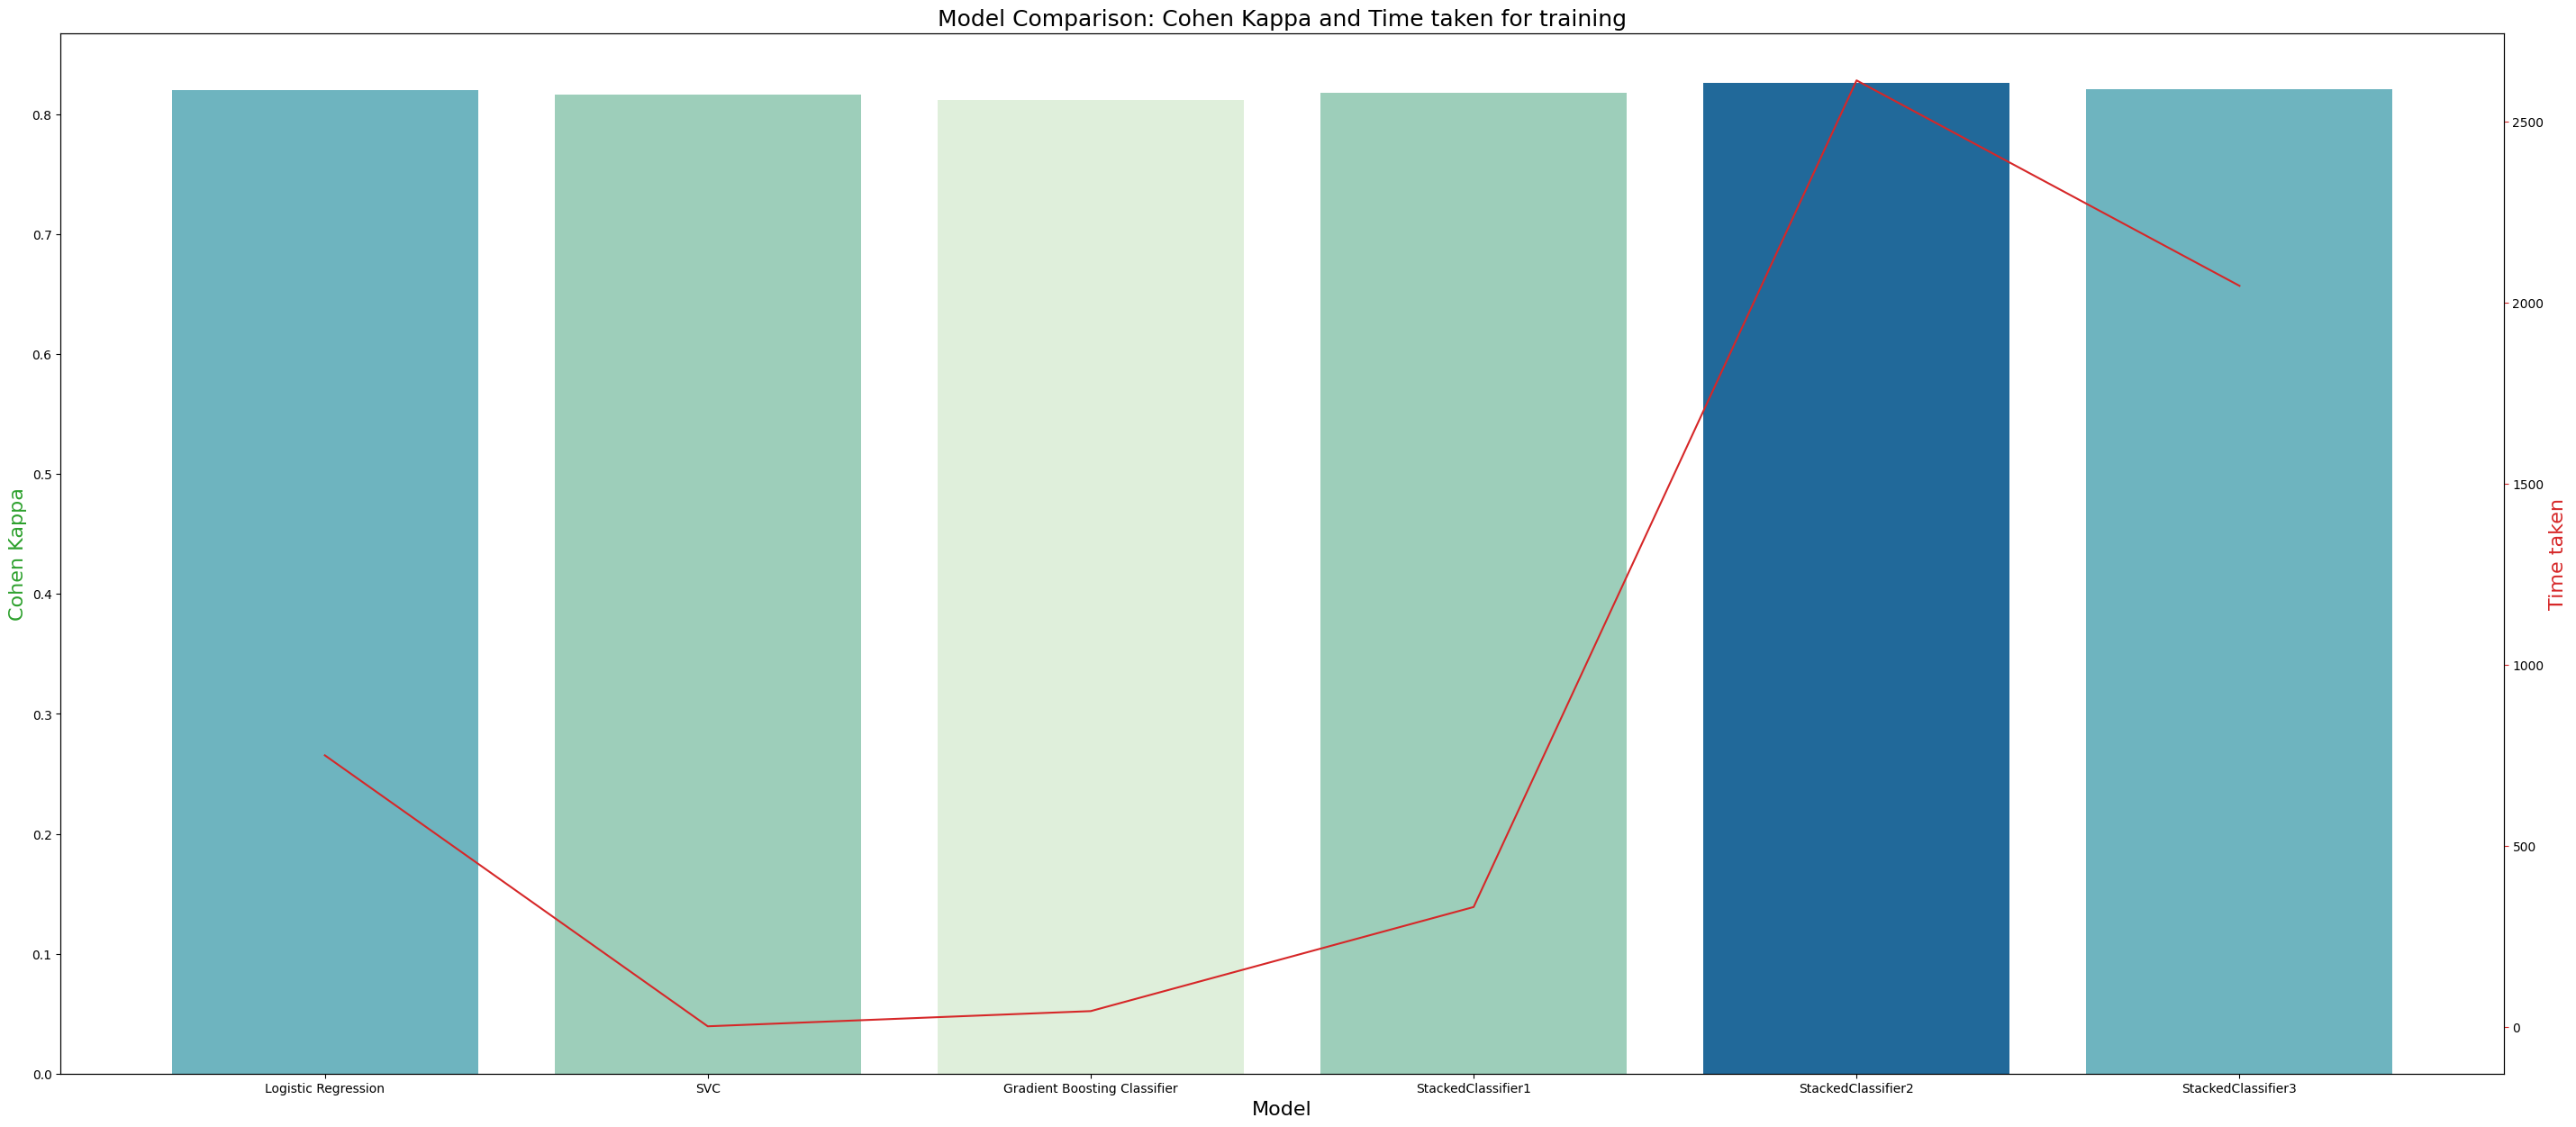

In [ ]:
fig, ax5 = plt.subplots(figsize=(35,15))
ax5.set_title('Model Comparison: Cohen Kappa and Time taken for training', fontsize=18)
color = 'tab:green'
ax5.set_xlabel('Model', fontsize=16)
ax5.set_ylabel('Balanced Accuracy', fontsize=16, color=color)
ax6 = sns.barplot(x='Model', y='Cohen Kappa', data = data, palette=colors_from_values(data['Cohen Kappa'], "GnBu"))
ax5.tick_params(axis='y')
ax6 = ax5.twinx()
color = 'tab:red'
ax6.set_ylabel('Time taken', fontsize=16, color=color)
ax6 = sns.lineplot(x='Model', y='Time taken', data = data, sort=False, color=color)
ax6.tick_params(axis='y', color=color)

In [82]:
performance2["Rank"] = performance2[['F1', 'PR-AUC', 'ROC-AUC', 'Cohen Kappa']].apply(tuple,axis=1)\
             .rank(method='dense',ascending=False).astype(int)

performance2.sort_values("Rank")

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time,Rank
4,StackedClassifier2,0.999440,0.893828,0.937757,0.893828,0.913245,0.811808,0.936575,0.826491,2613.324426,48.825730,1
5,StackedClassifier3,0.999423,0.889946,0.936066,0.889946,0.910435,0.781418,0.930158,0.820871,2046.190195,40.349039,2
0,SVC,0.999414,0.895128,0.929186,0.895128,0.910075,0.732134,0.907159,0.820151,750.240949,13.377140,3
3,StackedClassifier1,0.999401,0.897715,0.923750,0.897715,0.909033,0.697622,0.868207,0.818067,331.467418,4.953957,4
1,SGD Classifier,0.999401,0.893842,0.926511,0.893842,0.908193,0.696806,0.928485,0.816388,2.186654,0.167054,5
2,MLP Classifier,0.999396,0.886025,0.932178,0.886025,0.905956,0.811319,0.978142,0.811915,44.125443,0.311268,6


Learning curve is used to compare the performance of the models on training and testing data over a varying number of training instances.

In [83]:
n_rows = (len(models_stacking) // 4) + (len(models_stacking) % 4 > 0)
n_columns = 4
index = 1

plt.figure(figsize=(5*n_columns,5*n_rows))

for name, model in models_stacking:
    plt.subplot(n_rows, n_columns, index)
    plt.tight_layout(h_pad=2)
    plot_learning_curve(name, model)
    index = index + 1

From the Learning Curves, we can conclude that:

- Logistic Regression, Ada Boost Classifier and Stacked Classifier 2 have minimal overfitting because the validation balanced accuracy scores are almost the same as the training balanced accuracy scores.

- Gradient Boosting Classifier, Stacked Classifier 1 and Stacked Classifier 3 have slight overfitting because the validation balanced accuracy scores are slightly lower than the training balanced accuracy scores, however this difference lowers as the training set size increases.

## By considering the balanced accuracy, F1, PR-AUC, ROC-AUC, Cohen's Kappa, Training Time and learning curve, the best model is the Gradient Boosting Classifier

# Conclusion and Results

- The model has a balanced accuracy of 0.7175, Precision-Recall AUC of 0.6777, Cohen's Kappa score of 0.496 and Training Time of 1.8216s.

- The model is able to generalise well on the testing data and can predict rain in Australia with an accuracy of 0.8547.